## Импорт сторонних библиотек

In [96]:
import pickle
import pandas as pd

# Для визуализации
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import missingno as msno

import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample
# from sklearn.metrics import accuracy_score
# import dask.dataframe as dd

# Сборщик мусора
import gc

# для работы с time zone при создание Датафрейма с данными о городах России
from datetime import datetime
import pytz
# Для подсчета растояния до москвы по координатам (для городов России)
from math import radians, sin, cos, sqrt, atan2

## Загрузка данных

In [45]:
sessions_df = pd.read_pickle("data/ga_sessions.pkl")
sessions_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,None,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [46]:
hits_df = pd.read_pickle("data/ga_hits.pkl")
hits_df

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,None
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,None
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,None
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,None


# Data Preparation

## Data Cleaning

#### Целевая переменная

Определяем целевую переменную исходя из ТЗ, создадим новую колонку target_action в которой значение 1 будет означать совершение целоевого действия.<br>
Целевое действие — события типа «Оставить заявку» и «Заказать звонок» (ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']).

In [47]:
target_action_types = ('sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click')
hits_df['target_action'] = hits_df['event_action'].apply(lambda x: 1 if x in target_action_types else 0)

# Проверим значение целевой переменной у строк входящих в target_action_types
hits_df['target_action'][hits_df['event_action'].isin(target_action_types)].describe()


count    104908.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: target_action, dtype: float64

In [48]:
print(sessions_df['session_id'].nunique())
# Создадим датафрейм содержащий session_id и CR (Conversion Rate) 
session_target_df = hits_df[['session_id', 'target_action']].groupby(['session_id'], as_index=False).max().rename(columns={'target_action':'conversion_rate'})
session_target_df['conversion_rate'].value_counts()


1860042


conversion_rate
0    1683850
1      50760
Name: count, dtype: int64

С помощью merge обьеденим датафрейм с сессиями и созданный датафрейм, по колонке session_id, Таким образом мы получим

In [49]:
# data1 = pd.DataFrame({'a': [1,2,3], 'b': ['q','w','e']})
# data2 = pd.DataFrame({'a': [1,3,5], 'te': [20,65,30]})
# res = pd.merge(data1, data2, on='a')
# res

sessions_cr_df = pd.merge(sessions_df, session_target_df, on='session_id')
sessions_cr_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,conversion_rate
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,None,NaN,1920x1080,Chrome,Russia,Moscow,0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,390x844,Safari,Russia,Stavropol,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,0


In [50]:
sessions_cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 19 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
 18  conversion_rate           int64 
dtypes: int64(2), object(17)
memory usage: 251.1+ MB


In [51]:
# Разделение датафрейма на обучающую и тестовую выборки
sessions_cr_df, finaltest_df = train_test_split(sessions_cr_df, test_size=0.001, random_state=42, stratify=sessions_cr_df['conversion_rate'])

finaltest_df.to_pickle("tmp/data_to_test_api.pkl")
sessions_cr_df.to_pickle("tmp/data_to_train_api.pkl")
print("данные для теста API сохранены в tmp/data_to_test_api.pkl")

данные для теста API сохранены в tmp/data_to_test_api.pkl


#### Удаление лишних колонок из sessions_df

In [52]:
columns_to_drop = ['client_id', 'visit_date', 'visit_time', 'visit_number', 'session_id']

sessions_cr_df.drop(columns=columns_to_drop, inplace=True)
sessions_cr_df.shape
# [v]

(1730533, 14)

In [53]:
# Удалим из памяти не нужные датафреймы
del session_target_df, sessions_df, hits_df
gc.collect()

201

#### Избавляемся от Пропусков

Заметил что встречается значение в разных колонках '(not set)', необходимо преровнять эти записи к пустотам

In [54]:
sessions_cr_df.isin(['(not set)']).sum()

utm_source                      0
utm_medium                    405
utm_campaign                    0
utm_adcontent                   0
utm_keyword                     0
device_category                 0
device_os                     308
device_brand                16383
device_model                    0
device_screen_resolution        0
device_browser                 11
geo_country                  1066
geo_city                    73211
conversion_rate                 0
dtype: int64

In [55]:
# Чистка датафрейма от '(not set)' заменяя на NaN
sessions_cr_df.replace(['(not set)', ''], pd.NA, inplace=True)
sessions_cr_df.isin(['(not set)', '']).sum()
# [v]

utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
conversion_rate             0
dtype: int64

Отоброзим пропущенные значения в процентах по колонкам и продемонстрируем визуально

device_model     99.13
utm_keyword      58.93
device_os        58.55
device_brand     20.99
utm_adcontent    17.56
utm_campaign     11.27
geo_city          4.23
geo_country       0.06
utm_medium        0.02
dtype: float64


<Axes: >

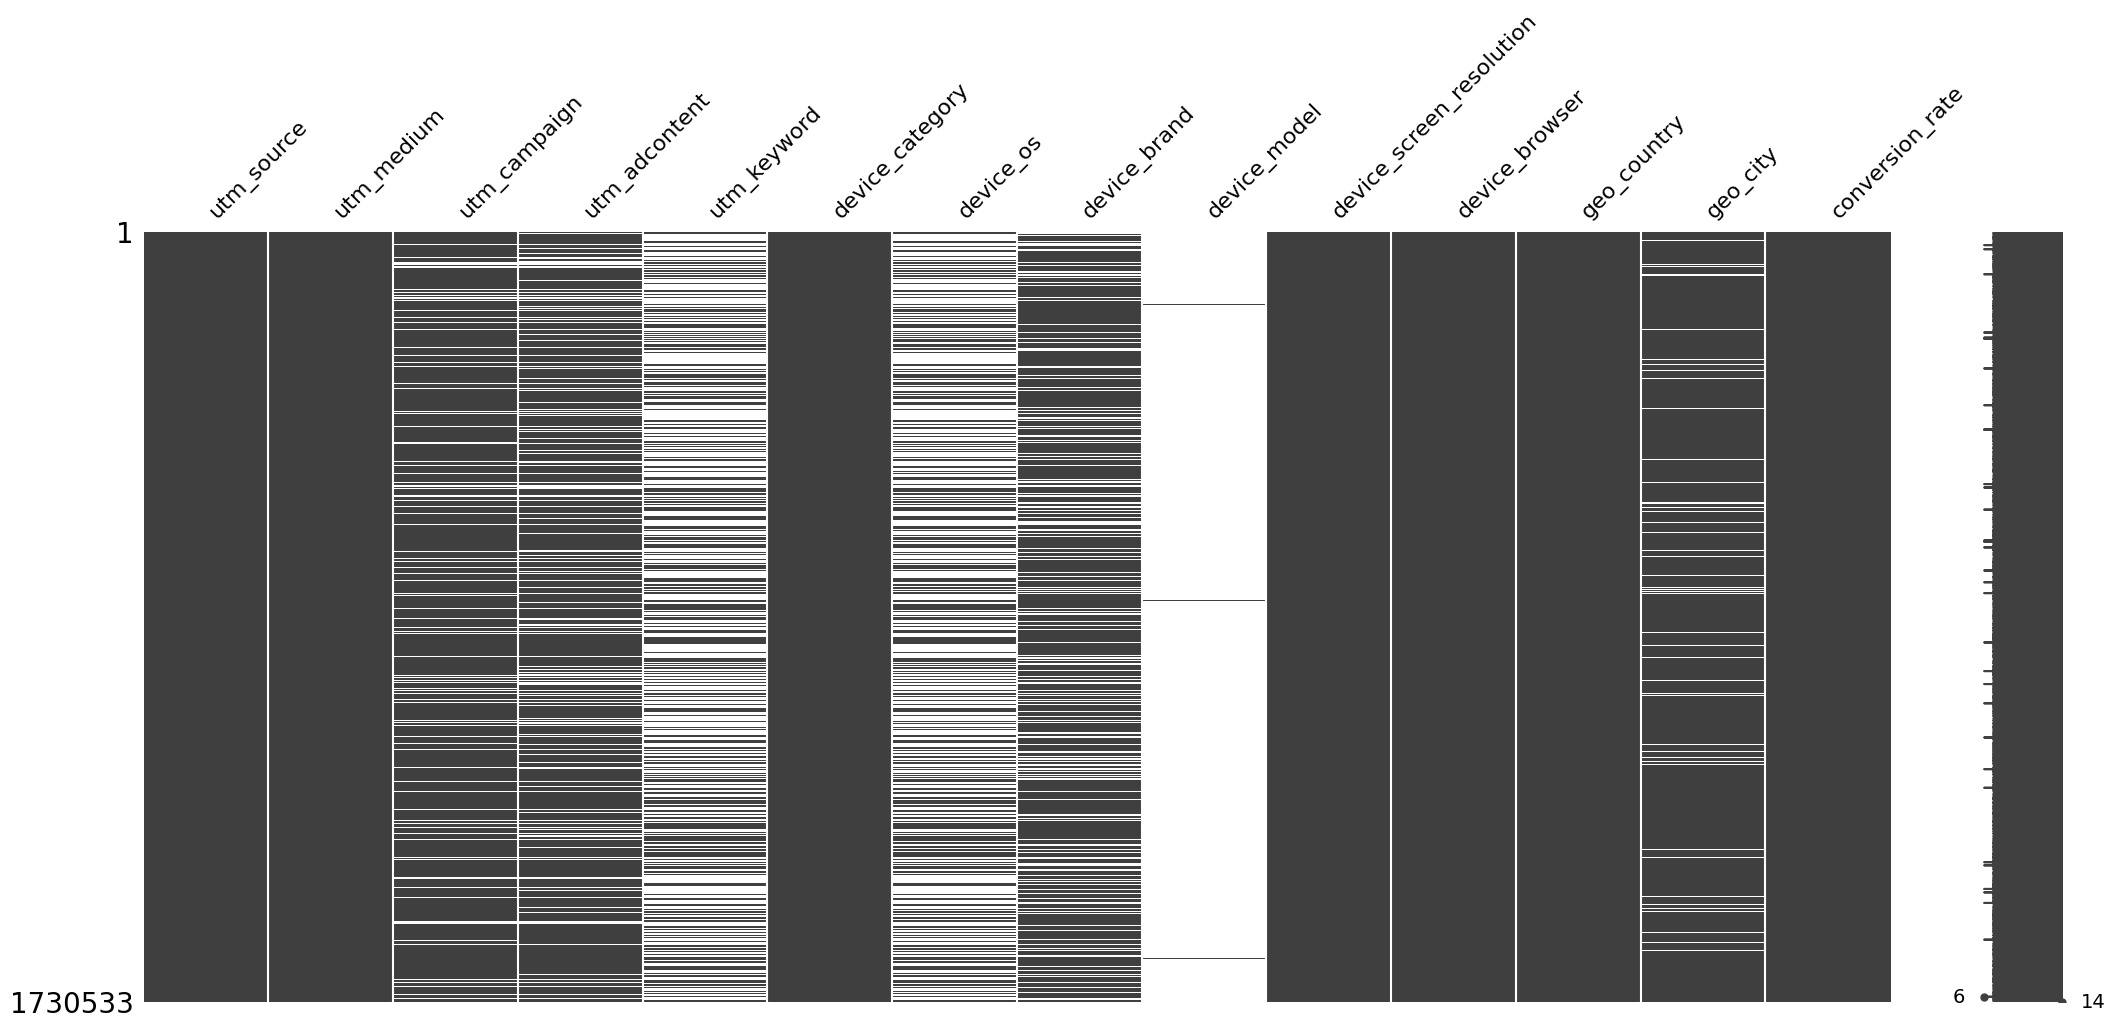

In [56]:
# выявление пропущенных значений
isna_percent = round(sessions_cr_df.isna().sum() / sessions_cr_df.shape[0] * 100, 2)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию
msno.matrix(sessions_cr_df)  # Визуализация заполненности колонок данными

Удаляем device_model, этих данных почти нет:

In [57]:
# Удаляем device_model, этих данных почти нет а те данные что есть не содержат полезной инфы.
sessions_cr_df.drop(columns=['device_model'], inplace=True)
sessions_cr_df.shape
# [v]

(1730533, 13)

In [58]:
print(sessions_cr_df['device_category'].value_counts(), "\n")

device_category
mobile     1367279
desktop     346567
tablet       16687
Name: count, dtype: int64 



##### <b>Даполняем данные из связанных колонок</b> (device_os, device_brand, device_category, device_browser):

выводы на основе изучения данных датафрейме

In [59]:
print("Уникальные device_os.unique():")
# Уточним гипотезу что 'device_os' = 'iOS' если 'device_category' = mobile и 'device_brand' = Apple
print("device_os = ", sessions_cr_df[(sessions_cr_df['device_os'].notna()) & (sessions_cr_df['device_category'] == 'mobile') & (sessions_cr_df['device_brand'] == 'Apple')]['device_os'].unique()
      ,"если 'device_category' = mobile и 'device_brand' = Apple")

# Уточним гипотезу что 'device_os' = 'iOS' если 'device_category' = desktop и 'device_brand' = Apple
print(sessions_cr_df[(sessions_cr_df['device_os'].notna()) & (sessions_cr_df['device_category'] == 'desktop') & (sessions_cr_df['device_brand'] == 'Apple')]['device_os'].unique(),
     "если 'device_category' = desktop и 'device_brand' = Apple")

# Проверяем можем ли мы установить device_os = Anroid у телефона если производитель не Apple:
print("\nКоличество строк Операционная система не Андроид при этом производитель не Apple: ", sessions_cr_df[(sessions_cr_df['device_os'].notna())&(sessions_cr_df['device_category']=='mobile')&
    (sessions_cr_df['device_brand']!='Apple') & (sessions_cr_df['device_os']!= 'Android')]['device_os'].shape[0])
print("количество строк относительное обьема данных не ощутимо мало, поэтому можем указать им device_os = Андроид\n (если device_brand не Apple и device_category = mobile)")

# Проверяем можем ли мы установить device_os = Anroid у планшетов если производитель не Apple:
print("\nЧисло планшетов device_os не Anroid и и при это производитель не Эпл: ", sessions_cr_df[(sessions_cr_df['device_os'].notna())&(sessions_cr_df['device_category']=='tablet')&
    (sessions_cr_df['device_brand']!='Apple') & (sessions_cr_df['device_os']!= 'Android')]['device_os'].shape[0])
print("количество строк относительное обьема данных не ощутимо мало, поэтому можем указать им device_os = Андроид\n (если device_brand не Apple и device_category = tablet)")


# 'device_os' для 'desktop' ищем закономерности
print("\n #0#", sessions_cr_df[(sessions_cr_df['device_category'] == 'desktop')]['device_brand'].value_counts())
# вывод0: записи с 'device_category' = 'desktop' не содержат информации о device_brand

print("\n #1#", 
      sessions_cr_df[(sessions_cr_df['device_os'].notna()) & 
    (sessions_cr_df['device_category'] == 'desktop') & 
    (sessions_cr_df['device_brand']!='Apple')]['device_os'].value_counts())
# вывод1: Так как в выдаче присутствует Macintish у device_os=Macintosh пустой device_brand. Буду использовать при заполнение device_brand

print("\n #2#", 
      sessions_cr_df[(sessions_cr_df['device_os'].isin(['Linux', 'Chrome OS', 'Tizen'])) & 
    (sessions_cr_df['device_category'] == 'desktop')]['device_brand'].unique())
# вывод2: У device_os = ['Linux', 'Chrome OS', 'Tizen'] так же нету device_brand. Буду использовать при заполнение device_brand

# Гипотеза если 'device_browser' = Safari то мы можем утверждать что device_brand = 'Apple'
print("\n #3#", sessions_cr_df[(sessions_cr_df['device_browser'].isin(['Safari', 'Safari (in-app)']))]['device_brand'].value_counts())

# Гипотеза если 'device_browser' = Samsung Internet то мы можем утверждать что device_brand = 'Samsung'
print("\n #4#", sessions_cr_df[sessions_cr_df['device_browser'].isin(['Samsung Internet'])]['device_brand'].value_counts())

# Проверим какие браузеры есть у desktop при пустом device_os
print("\nС пустыми device_os Остались только desktop", 
      sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
      (sessions_cr_df['device_category'].isin(['desktop'])), ['device_browser']].value_counts()[:10],
     "\n При Safari и desktop можно указать device_os = Macintosh")

Уникальные device_os.unique():
device_os =  ['iOS'] если 'device_category' = mobile и 'device_brand' = Apple
['iOS'] если 'device_category' = desktop и 'device_brand' = Apple

Количество строк Операционная система не Андроид при этом производитель не Apple:  116
количество строк относительное обьема данных не ощутимо мало, поэтому можем указать им device_os = Андроид
 (если device_brand не Apple и device_category = mobile)

Число планшетов device_os не Anroid и и при это производитель не Эпл:  16
количество строк относительное обьема данных не ощутимо мало, поэтому можем указать им device_os = Андроид
 (если device_brand не Apple и device_category = tablet)

 #0# device_brand
Apple        70
Huawei       19
Xiaomi       10
Samsung       8
Realme        5
Google        4
OPPO          3
Flexymove     3
Beelink       2
OnePlus       2
Nokia         1
Philips       1
Asus          1
Name: count, dtype: int64

 #1# device_os
Windows      81637
Macintosh    23378
Linux         4558
Chrome O

<b>['device_brand']</b>

In [60]:
# Заполняем Пустоты device_brand = 'Apple' если используемый браузер Safari
sessions_cr_df.loc[(sessions_cr_df['device_brand'].isna()) & 
        (sessions_cr_df['device_browser'].isin(['Safari', 'Safari (in-app)'])), ['device_brand']] = 'Apple'

# Заполняем Пустоты device_brand = 'Samsung' если используемый браузер Samsung Internet
sessions_cr_df.loc[(sessions_cr_df['device_brand'].isna()) & 
        (sessions_cr_df['device_browser'].str.contains('Samsung')), ['device_brand']] = 'Samsung'

sessions_cr_df.loc[(sessions_cr_df['device_brand'].isna()), ['device_browser']].value_counts()
# [v]

device_browser                  
Chrome                              216561
YaBrowser                            57870
Opera                                17038
Firefox                              15444
Edge                                 15182
Android Webview                        963
Mozilla Compatible Agent               335
[FBAN                                  115
MRCHROME                                72
Instagram 208.0.0.32.135 Android        72
Instagram 209.0.0.21.119 Android        49
Internet Explorer                       20
Android                                 19
Maxthon                                 17
Mozilla                                 16
UC Browser                              14
Instagram 194.0.0.36.172 Android        14
Instagram 202.0.0.37.123 Android        12
Opera Mini                              11
com.vk.vkclient                          8
Puffin                                   7
helloworld                               6
Instagram 212.0.0.38.

<b>Продолжаем с [device_brand]</b>

In [61]:
# Проверяем device_os = macintosh
print(sessions_cr_df[(sessions_cr_df['device_os']=='Macintosh')].shape,
     "device_os: Macintosh or iOS when device_brand is ",
sessions_cr_df[(sessions_cr_df['device_os'].isin(['Macintosh', 'iOS']))]['device_brand'].unique())

# Заполняем device_brand = Apple если 'device_os' = ['Macintosh', 'iOS']
sessions_cr_df.loc[(sessions_cr_df['device_brand'].isna()) & 
    (sessions_cr_df['device_os'].isin(['Macintosh', 'iOS'])), ['device_brand']] = 'Apple'

sessions_cr_df[(sessions_cr_df['device_os'].isin(['Macintosh', 'iOS']))]['device_brand'].unique()
# [v]

(23397, 13) device_os: Macintosh or iOS when device_brand is  [None 'Apple']


array(['Apple'], dtype=object)

Оставшиеся пустые значения заполним 'empty'

In [62]:
sessions_cr_df.fillna({'device_brand': 'empty'}, inplace=True)
# [v]

In [63]:
# После заполнения пустот проверяем процент пустых значений
isna_percent = round(sessions_cr_df.isna().sum() / sessions_cr_df.shape[0] * 100, 4)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию

utm_keyword       58.9272
device_os         58.5530
utm_adcontent     17.5579
utm_campaign      11.2746
geo_city           4.2305
geo_country        0.0616
utm_medium         0.0234
utm_source         0.0044
device_browser     0.0006
dtype: float64


<b>['device_os']</b>

In [64]:

# Заполняем 'device_os' == 'iOS' если 'device_category' = ['mobile', 'tablet'] и 'device_brand' = Apple
sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
    (sessions_cr_df['device_category'].isin(['mobile', 'tablet'])) & 
    (sessions_cr_df['device_brand'] == 'Apple'), ['device_os']] = 'iOS'

# 'device_os' == 'Android' если 'device_category' = ['mobile', 'tablet']
sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
    (sessions_cr_df['device_category'].isin(['mobile', 'tablet'])) & 
    (sessions_cr_df['device_brand'] != 'Apple'), ['device_os']] = 'Android'

# 'device_os' == 'Macintosh' если 'device_category' = desktop и 'device_brand' = Apple
sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
    (sessions_cr_df['device_category'] == 'desktop') & 
    (sessions_cr_df['device_brand'] == 'Apple'), ['device_os']] = 'Macintosh'


# 'device_os' == 'Macintosh' если 'device_category' = desktop и 'device_browser' = Safari
sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
    (sessions_cr_df['device_category'] == 'desktop') & 
    (sessions_cr_df['device_browser'] == 'Safari'), ['device_os']] = 'Macintosh'

# 'device_os' == 'Android' если 'device_browser' содержит Android и device_category = desktop
sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
      (sessions_cr_df['device_category'] == 'desktop') &
      (sessions_cr_df['device_browser'].str.contains('Android')), ['device_os']] = 'Android'

# 'device_os' == 'Windows' если 'device_browser' == ['Edge', 'Internet Explorer'] и device_category = desktop
sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()) & 
      (sessions_cr_df['device_category'] == 'desktop') &
      (sessions_cr_df['device_browser'].isin(['Edge', 'Internet Explorer'])), ['device_os']] = 'Windows'

print("заполнили device_os для мобильных устройств, остались desktop")
print(sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()), ['device_category']].value_counts())

заполнили device_os для мобильных устройств, остались desktop
device_category
desktop            201269
Name: count, dtype: int64


<b>Оставшиеся пустые значения в device_os заполним 'empty'</b>

In [65]:
# sessions_cr_df.loc[(sessions_cr_df['device_os'].isna()), ['device_os']] = 'empty'
sessions_cr_df.fillna({'device_os': 'empty'}, inplace=True)
sessions_cr_df.isna().sum()
# [v]

utm_source                       76
utm_medium                      405
utm_campaign                 195110
utm_adcontent                303846
utm_keyword                 1019754
device_category                   0
device_os                         0
device_brand                      0
device_screen_resolution          0
device_browser                   11
geo_country                    1066
geo_city                      73211
conversion_rate                   0
dtype: int64

In [66]:
# После заполнения пустот проверяем процент пустых значений
isna_percent = round(sessions_cr_df.isna().sum() / sessions_cr_df.shape[0] * 100, 4)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию

utm_keyword       58.9272
utm_adcontent     17.5579
utm_campaign      11.2746
geo_city           4.2305
geo_country        0.0616
utm_medium         0.0234
utm_source         0.0044
device_browser     0.0006
dtype: float64


##### <b>['utm_keyword'] - изучим и избавимся от пустот.</b>

In [67]:
print("Уникальных ключевых слов:", sessions_cr_df['utm_keyword'].nunique())
sessions_cr_df['utm_keyword'].value_counts()

Уникальных ключевых слов: 1192


utm_keyword
puhZPIYqKXeFPaUviSjo    465487
aXQzDWsJuGXeBXexNHjc     18128
ITfrGJNwVsHBGJMAKoct     12383
pHqgLcdBQPSLcrTpLkdr     12304
hAmNSZmQkKQKAjZEGlgb     10409
                         ...  
iOMuvNvFqsfUXNqBuSzy         1
VGDDruVvwprnUWMpndUF         1
xhbLYKykcxmylecTsBop         1
PKriXrefSFPLBYtCRGSE         1
ULAUPJGgNiZYQgwZwZGR         1
Name: count, Length: 1192, dtype: int64

Вывод: Ключевые слова представляют из себя закодированный хэш.<br>
Думаю стоит заполнить пустоты значением 'empty'

In [68]:
# заполняем пустоты в utm_keyword значением 'empty'
# sessions_cr_df.loc[sessions_cr_df['utm_keyword'].isna(), ['utm_keyword']] = 'empty'
sessions_cr_df.fillna({'utm_keyword': 'empty'}, inplace=True)
sessions_cr_df.isna().sum()

utm_source                      76
utm_medium                     405
utm_campaign                195110
utm_adcontent               303846
utm_keyword                      0
device_category                  0
device_os                        0
device_brand                     0
device_screen_resolution         0
device_browser                  11
geo_country                   1066
geo_city                     73211
conversion_rate                  0
dtype: int64

In [69]:
# После заполнения пустот проверяем процент пустых значений
isna_percent = round(sessions_cr_df.isna().sum() / sessions_cr_df.shape[0] * 100, 4)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию

utm_adcontent     17.5579
utm_campaign      11.2746
geo_city           4.2305
geo_country        0.0616
utm_medium         0.0234
utm_source         0.0044
device_browser     0.0006
dtype: float64


##### <b>[utm_adcontent]</b> - анализ и заполнение пустот

In [70]:
utm_adcontent_value_counts = sessions_cr_df['utm_adcontent'].value_counts()
print(utm_adcontent_value_counts, "\n\nМода из колонки 'utm_adcontent' встречается в %:", round(utm_adcontent_value_counts.iloc[0]/sessions_cr_df.shape[0]*100,2))


print("Пустот в 'utm_adcontent' %: ", round(sessions_cr_df['utm_adcontent'].isna().sum()/sessions_cr_df.shape[0]*100,2))

print("Вывод: Заполним пустоты значением 'other'")

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    934458
vCIpmpaGBnIQhyYNkXqp    179257
xhoenQgDQsgfEPYNPwKO    104261
PkybGvWbaqORmxjNunqZ     58987
LLfCasrxQzJIyuldcuWy     18112
                         ...  
zQEFTgQvqExfbldEpotc         1
sRDBtYhZktEwHawjPKSb         1
gQEnaeQmOHisHSTEyzhp         1
VlbHDutfcfYJARFNICFX         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 280, dtype: int64 

Мода из колонки 'utm_adcontent' встречается в %: 54.0
Пустот в 'utm_adcontent' %:  17.56
Вывод: Заполним пустоты значением 'other'


Заполним пустые значения в колонке utm_adcontent значеним <b>'empty'</b>

In [71]:
# пустые значения в колонке utm_adcontent значеним 'empty'
# sessions_cr_df.loc[sessions_cr_df['utm_adcontent'].isna(), ['utm_adcontent']] = 'empty'
sessions_cr_df.fillna({'utm_adcontent': 'empty'}, inplace=True)
sessions_cr_df.isna().sum()

utm_source                      76
utm_medium                     405
utm_campaign                195110
utm_adcontent                    0
utm_keyword                      0
device_category                  0
device_os                        0
device_brand                     0
device_screen_resolution         0
device_browser                  11
geo_country                   1066
geo_city                     73211
conversion_rate                  0
dtype: int64

utm_campaign      11.2746
geo_city           4.2305
geo_country        0.0616
utm_medium         0.0234
utm_source         0.0044
device_browser     0.0006
dtype: float64


<Axes: >

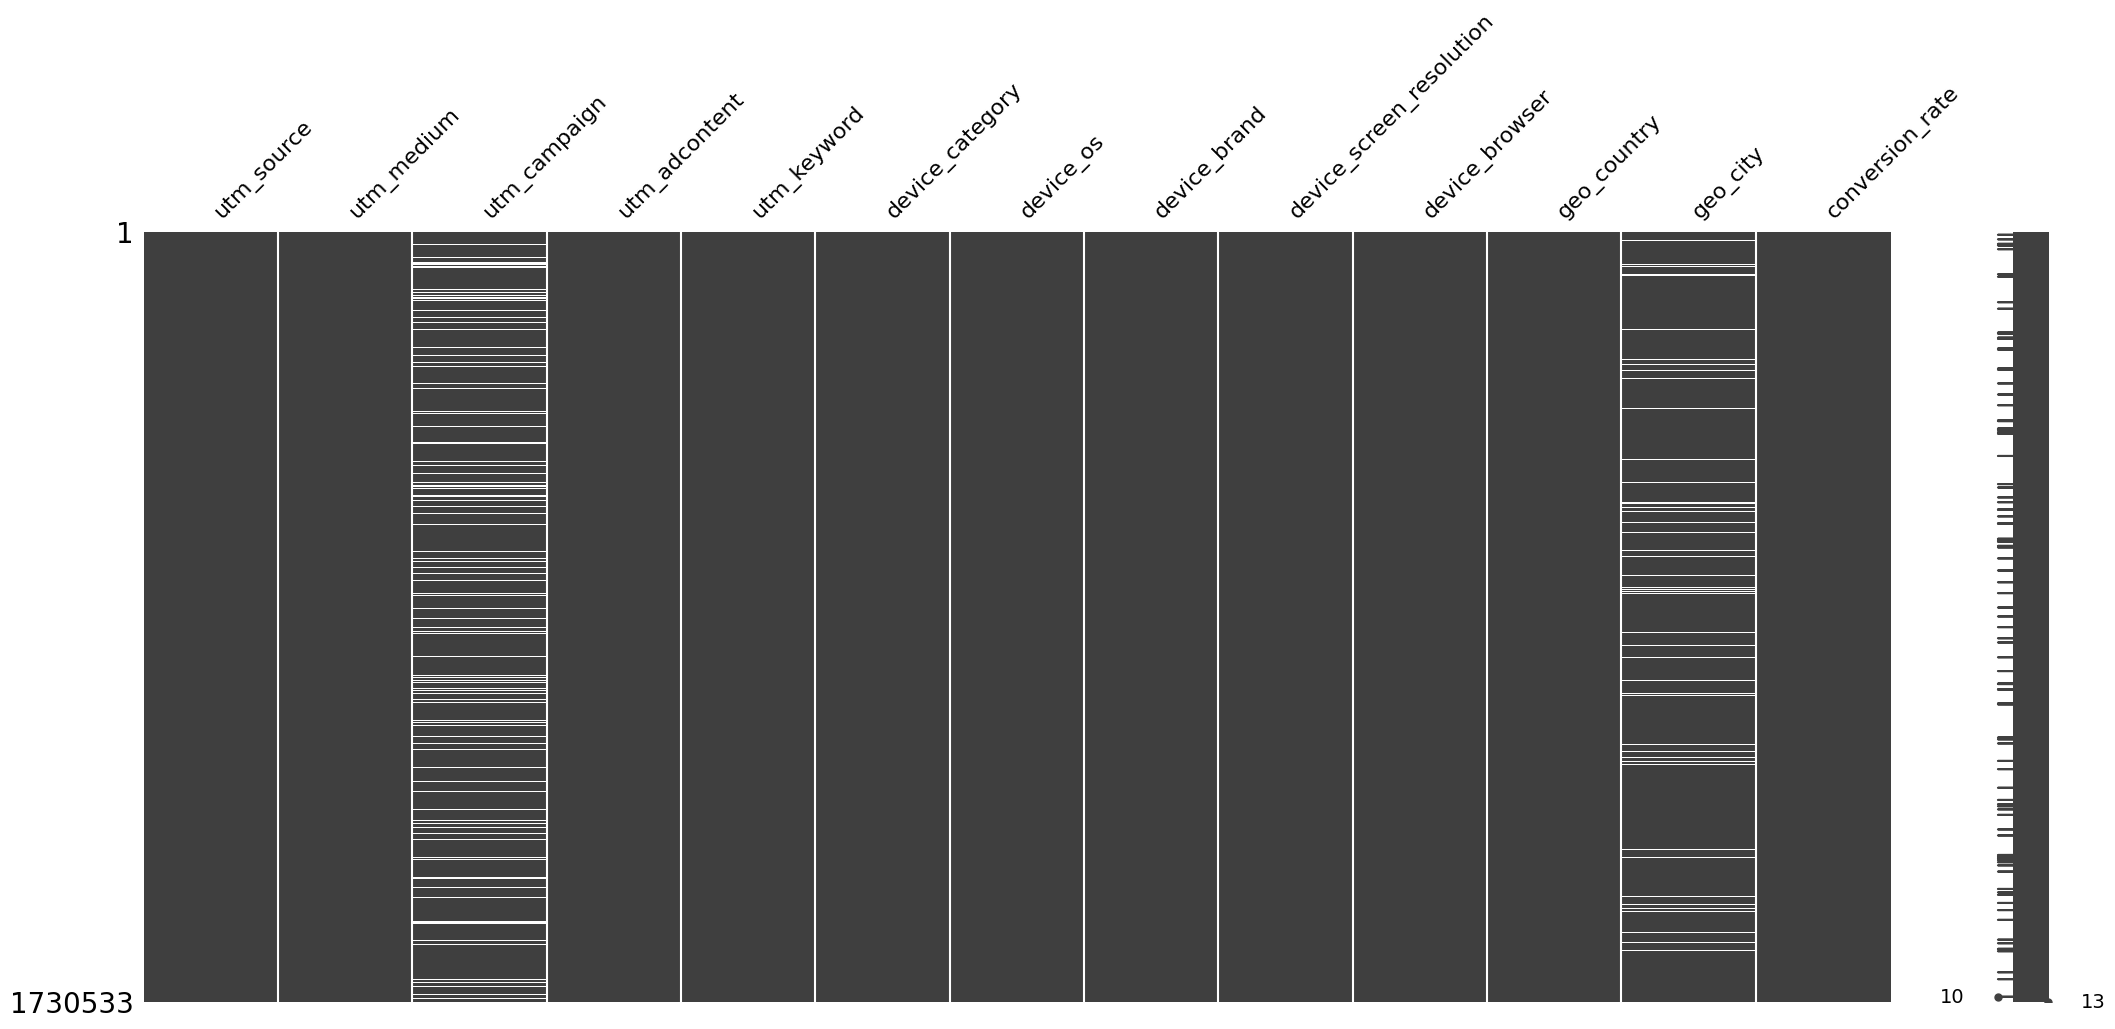

In [72]:
# После заполнения пустот проверяем процент пустых значений
isna_percent = round(sessions_cr_df.isna().sum() / sessions_cr_df.shape[0] * 100, 4)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию
msno.matrix(sessions_cr_df)  #  Визуализация заполненности колонок данными

##### <b>['utm_campaign']</b>

In [73]:

print("пустых в ['utm_campaign']:", sessions_cr_df['utm_campaign'].isna().sum())
sessions_cr_df['utm_campaign'].value_counts()

пустых в ['utm_campaign']: 195110


utm_campaign
LTuZkdKfxRGVceoWkVyg    422568
LEoPHuyFvzoNfnzGgfcd    320948
FTjNLDyTrXaWYgZymFkV    234720
gecBYcKZCPMcVYdSSzKP    133113
XHNUiSKKGTEpSAlaVMFQ     23722
                         ...  
YlsczTIyBSwTLNtuDkCd         1
FGuKxIlHfUzjrXnJWuBo         1
TwMQGFwDtGdibAEpQHYs         1
zFCiMWkbbAhTflrlLWnz         1
InOGyxvxAfYvSHCpIjJZ         1
Name: count, Length: 406, dtype: int64

In [74]:
# Заполним пустоты значением 'empty'
# sessions_cr_df['utm_campaign'] = sessions_cr_df['utm_campaign'].fillna('empty')
sessions_cr_df.fillna({'utm_campaign': 'empty'}, inplace=True)
print("пустых в ['utm_campaign']:", sessions_cr_df['utm_campaign'].isna().sum())

пустых в ['utm_campaign']: 0


##### <b>['geo_city']</b>

In [75]:

print("пустых в ['geo_city'] до заполнения:", sessions_cr_df['geo_city'].isna().sum())

# Заполняем пустоты значением 'empty'
# sessions_cr_df['geo_city'] = sessions_cr_df['geo_city'].fillna('empty')
sessions_cr_df.fillna({'geo_city': 'empty'}, inplace=True)

print("пустых в ['geo_city'] после заполнения:", sessions_cr_df['geo_city'].isna().sum())

пустых в ['geo_city'] до заполнения: 73211
пустых в ['geo_city'] после заполнения: 0


##### <b>['geo_country']</b>

In [76]:
print("пустых в ['geo_country'] до заполнения:", sessions_cr_df['geo_country'].isna().sum())

# Заполняем пустоты значением 'empty'
# sessions_cr_df['geo_country'] = sessions_cr_df['geo_country'].fillna('empty')
sessions_cr_df.fillna({'geo_country': 'empty'}, inplace=True)

print("пустых в ['geo_country'] после заполнения:", sessions_cr_df['geo_country'].isna().sum())

пустых в ['geo_country'] до заполнения: 1066
пустых в ['geo_country'] после заполнения: 0


##### <b>['utm_medium']</b> - тип привлечения

In [77]:
print("пустых в ['utm_medium'] до заполнения:", sessions_cr_df['utm_medium'].isna().sum())

# Заполняем пустоты значением 'empty'
# sessions_cr_df['utm_medium'] = sessions_cr_df['utm_medium'].fillna('empty')
sessions_cr_df.fillna({'utm_medium': 'empty'}, inplace=True)

print("пустых в ['utm_medium'] после заполнения:", sessions_cr_df['utm_medium'].isna().sum())

пустых в ['utm_medium'] до заполнения: 405
пустых в ['utm_medium'] после заполнения: 0


utm_source        0.0044
device_browser    0.0006
dtype: float64


<Axes: >

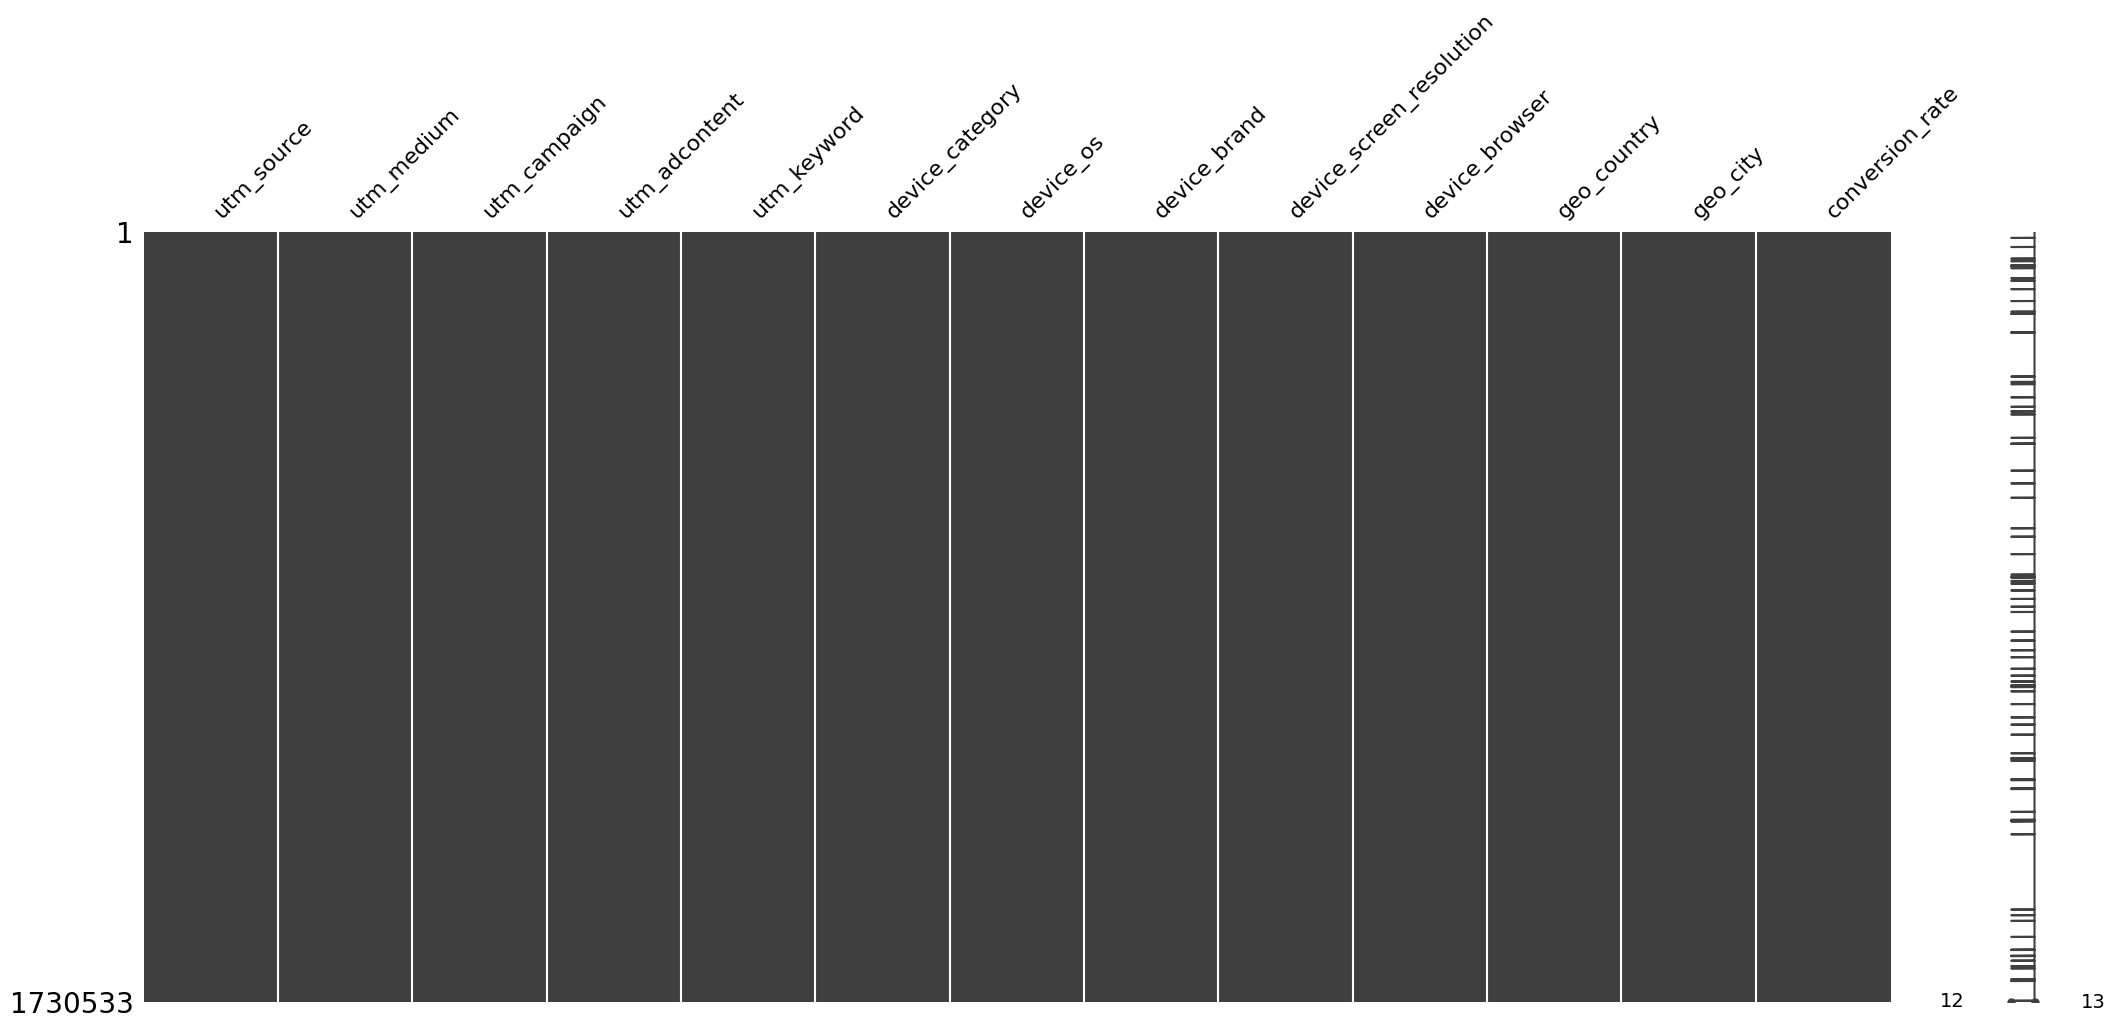

In [78]:
# После заполнения пустот проверяем процент пустых значений
isna_percent = round(sessions_cr_df.isna().sum() / sessions_cr_df.shape[0] * 100, 4)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию
msno.matrix(sessions_cr_df)  #  Визуализация заполненности колонок данными

In [79]:
sessions_cr_df.isna().sum()

utm_source                  76
utm_medium                   0
utm_campaign                 0
utm_adcontent                0
utm_keyword                  0
device_category              0
device_os                    0
device_brand                 0
device_screen_resolution     0
device_browser              11
geo_country                  0
geo_city                     0
conversion_rate              0
dtype: int64

In [80]:
# sessions_cr_df['utm_source'] = sessions_cr_df['utm_source'].fillna(sessions_cr_df['utm_source'].mode()[0])
# sessions_cr_df.fillna({'utm_source': sessions_cr_df['utm_source'].mode()[0]}, inplace=True)
sessions_cr_df.fillna({'utm_source': 'empty'}, inplace=True)

# sessions_cr_df['device_browser'] = sessions_cr_df['device_browser'].fillna(sessions_cr_df['device_browser'].mode()[0])
# sessions_cr_df.fillna({'device_browser': sessions_cr_df['device_browser'].mode()[0]}, inplace=True)
sessions_cr_df.fillna({'device_browser': 'empty'}, inplace=True)
sessions_cr_df.isna().sum()

utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
conversion_rate             0
dtype: int64

Из значений utm_medium создадим новый признак <b>['is_organic_visit']</b>
<br>
Если <b>['utm_medium']</b> = ['organic', 'referral', '(none)'] тогда ['is_organic_visit'] = 1

In [81]:

# def check_utm_to_organic(utm):
#     # print(utm)
#     is_organic = 1 if utm in ['organic', 'referral', '(none)']  else 0
#     return is_organic

sessions_cr_df['is_organic_visit'] = sessions_cr_df['utm_medium'].apply(lambda x: 1 if x in ['organic', 'referral', '(none)']  else 0)
sessions_cr_df[['utm_medium', 'is_organic_visit']]

# [v]


,utm_medium,is_organic_visit
596395,banner,0
1261431,(none),1
1531319,cpm,0
290942,(none),1
74585,cpc,0
...,...,...
1678659,referral,1
5200,banner,0
1525946,banner,0
1127352,cpm,0


Можем удалить колонку utm_medium

In [82]:
# Удаление utm_medium
sessions_cr_df.drop(columns=['utm_medium'], inplace=True)
print(sessions_cr_df.shape)
sessions_cr_df.isna().sum()

(1730533, 13)


utm_source                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
conversion_rate             0
is_organic_visit            0
dtype: int64

In [83]:
sessions_cr_df.to_csv("tmp/filled_sessions_df_0.1.csv", index=False)


In [84]:
sessions_cr_df.isna().sum()

utm_source                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
conversion_rate             0
is_organic_visit            0
dtype: int64

In [86]:
del sessions_cr_df

NameError: name 'sessions_cr_df' is not defined

#### Чистка от Аномалий и выбросов

##### Анализ категориальных данных

В наших данных очень много категориальных фитч. Стоит пройтись по категориальным признакам и прировнять "редкие" значения под одну категорию 'other'.<br> Чтобы дальнейшая обработка через onehotencoder не наплодила фитч заведома равных 0 в большенстве случаях.

Значение будет считаться редким если не повторяется больше 'min_rarity' раза

In [97]:
sessions_df_cleaned = pd.read_csv("tmp/filled_sessions_df_0.1.csv")
sessions_df_cleaned.shape

(1730533, 13)

In [98]:
sessions_df_cleaned.isna().sum()

utm_source                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
conversion_rate             0
is_organic_visit            0
dtype: int64

In [103]:
print("Данных с CR=1 : ", sessions_df_cleaned[sessions_df_cleaned['conversion_rate'] == 1].shape)
print("Данных с CR=0 : ", sessions_df_cleaned[sessions_df_cleaned['conversion_rate'] == 0].shape)

Данных с CR=1 :  (50264, 13)
Данных с CR=0 :  (1680269, 13)


<b>Данных с CR=1 сильно меньше, стоит применить Даунсемплинг данных</b>

In [110]:
# Разделяем данные по классам
df_majority = sessions_df_cleaned[sessions_df_cleaned['conversion_rate'] == 0]
df_minority = sessions_df_cleaned[sessions_df_cleaned['conversion_rate'] == 1]

# Даунсемплинг мажоритарного класса до количества примеров в миноритарном классе
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # Без замены
                                   n_samples=len(df_minority),  # До количества примеров миноритарного класса
                                   random_state=42)  # Для воспроизводимости

# Комбинируем сбалансированные данные
sessions_df_cleaned = pd.concat([df_majority_downsampled, df_minority])

# Перемешиваем данные и сбрасываем индексы
sessions_df_cleaned = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

sessions_df_cleaned

,utm_source,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,conversion_rate,is_organic_visit
0,ZpYIoDJMcFzVoPFsHGJL,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,empty,mobile,Android,Huawei,320x694,Chrome,Russia,Moscow,1,0
1,MvfHsxITijuriZxsqZqt,qUcotcWimEOQiboVPcCx,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,414x896,Safari,Russia,Vidnoye,0,0
2,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x812,Safari,Russia,Grozny,0,0
3,kjsLglQLzykiRbcDiGcD,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,XEayFbemrPYbxFeNbxif,desktop,Windows,empty,2048x1152,Chrome,Russia,Moscow,0,0
4,BHcvLfOaCWvWTykYqHVe,empty,empty,empty,desktop,empty,empty,1536x864,Chrome,Russia,empty,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100523,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,vjIFJEOjxEWepttdwCpg,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,0,0
100524,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,375x667,Safari,Russia,Odintsovo,0,1
100525,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x667,Safari,Russia,Nizhny Novgorod,0,0
100526,aXQzDWsJuGXeBXexNHjc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,desktop,empty,empty,1366x768,Firefox,Russia,empty,0,1


In [111]:
sessions_df_cleaned.shape[0]/10000

10.0528

In [112]:
min_rarity = sessions_df_cleaned.shape[0]/10000 # 0.001%


In [113]:


# ПРоверим какое количество уникальных значений встречается только min_rarity раз (и меньше) во всем датафрейме
for col in sessions_df_cleaned.columns:
    print('Характеристика: ', col, '\nКоличество уникальных значений: ', sessions_df_cleaned[col].nunique())
    columns_val_counts = sessions_df_cleaned[col].value_counts()
    print(f"Количесство редких значений (встречаются <= {min_rarity}): {columns_val_counts[columns_val_counts<=min_rarity].shape[0]}")
    
    print("----======------")

# columns_val_counts = sessions_cr_df['geo_city'].value_counts()
# columns_val_counts[columns_val_counts<=min_rarity]

Характеристика:  utm_source 
Количество уникальных значений:  55
Количесство редких значений (встречаются <= 10.0528): 1
----======------
Характеристика:  utm_campaign 
Количество уникальных значений:  149
Количесство редких значений (встречаются <= 10.0528): 9
----======------
Характеристика:  utm_adcontent 
Количество уникальных значений:  66
Количесство редких значений (встречаются <= 10.0528): 5
----======------
Характеристика:  utm_keyword 
Количество уникальных значений:  158
Количесство редких значений (встречаются <= 10.0528): 16
----======------
Характеристика:  device_category 
Количество уникальных значений:  3
Количесство редких значений (встречаются <= 10.0528): 0
----======------
Характеристика:  device_os 
Количество уникальных значений:  7
Количесство редких значений (встречаются <= 10.0528): 1
----======------
Характеристика:  device_brand 
Количество уникальных значений:  41
Количесство редких значений (встречаются <= 10.0528): 4
----======------
Характеристика:  devi

Преоброзуем редкие значения в каждой категориальной колонке приравняв к 'other'

In [114]:
column_to_update = ['utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 
                    'device_category', 'device_os', 'device_brand', 'device_browser', 
                    'geo_country', 'geo_city']
# Преоброзуем редкие значения в каждой категориальной колонке приравняв к 'other'
for col in column_to_update:    
    columns_val_counts = sessions_df_cleaned[col].value_counts()    
    if columns_val_counts[columns_val_counts<=min_rarity].shape[0]:  # если есть редкие значения
        # назначим значение other для всех значения встречающихся min_rarity раз илли меньше.
        sessions_df_cleaned.loc[sessions_df_cleaned[col].isin(columns_val_counts[columns_val_counts<=min_rarity].keys().to_list()), [col]] = 'other'

        # для проверки Выведем количество редких значений после преоброзования
        print('Характеристика: ', col, '\nКоличество уникальных значений: ', sessions_df_cleaned[col].nunique())        
        print(f"Количесство редких значений (втречаются <= {min_rarity}): {sessions_df_cleaned[sessions_df_cleaned[col].isin(columns_val_counts[columns_val_counts<=min_rarity].keys().to_list())].shape}")    
        print("----======------")
# [v]

Характеристика:  utm_source 
Количество уникальных значений:  54
Количесство редких значений (втречаются <= 10.0528): (0, 13)
----======------
Характеристика:  utm_campaign 
Количество уникальных значений:  140
Количесство редких значений (втречаются <= 10.0528): (0, 13)
----======------
Характеристика:  utm_adcontent 
Количество уникальных значений:  61
Количесство редких значений (втречаются <= 10.0528): (0, 13)
----======------
Характеристика:  utm_keyword 
Количество уникальных значений:  142
Количесство редких значений (втречаются <= 10.0528): (0, 13)
----======------
Характеристика:  device_os 
Количество уникальных значений:  7
Количесство редких значений (втречаются <= 10.0528): (5, 13)
----======------
Характеристика:  device_brand 
Количество уникальных значений:  37
Количесство редких значений (втречаются <= 10.0528): (0, 13)
----======------
Характеристика:  device_browser 
Количество уникальных значений:  12
Количесство редких значений (втречаются <= 10.0528): (0, 13)
----

##### Преоброзование device_screen_resolution

In [115]:
print(sessions_df_cleaned['device_screen_resolution'].value_counts())
sessions_df_cleaned['device_screen_resolution'].describe()

device_screen_resolution
414x896      8910
1920x1080    6975
375x812      6252
393x851      6076
375x667      4967
             ... 
320x687         1
393x961         1
447x842         1
473x1081        1
360x808         1
Name: count, Length: 893, dtype: int64


count      100528
unique        893
top       414x896
freq         8910
Name: device_screen_resolution, dtype: object

In [116]:
print(sessions_df_cleaned['device_screen_resolution'].value_counts())

sessions_df_cleaned['device_screen_width'] = sessions_df_cleaned['device_screen_resolution'].apply(lambda w: int(w.lower().split('x')[0]))
sessions_df_cleaned['device_screen_height'] = sessions_df_cleaned['device_screen_resolution'].apply(lambda h: int(h.lower().split('x')[1]))
sessions_df_cleaned[['device_screen_width','device_screen_height', 'device_screen_resolution']]#.apply(lambda x: format(x, 'f'))

# [v]

device_screen_resolution
414x896      8910
1920x1080    6975
375x812      6252
393x851      6076
375x667      4967
             ... 
320x687         1
393x961         1
447x842         1
473x1081        1
360x808         1
Name: count, Length: 893, dtype: int64


,device_screen_width,device_screen_height,device_screen_resolution
0,320,694,320x694
1,414,896,414x896
2,375,812,375x812
3,2048,1152,2048x1152
4,1536,864,1536x864
...,...,...,...
100523,414,896,414x896
100524,375,667,375x667
100525,375,667,375x667
100526,1366,768,1366x768


Text(0.5, 1.0, 'Ящик с усами для device_screen_width')

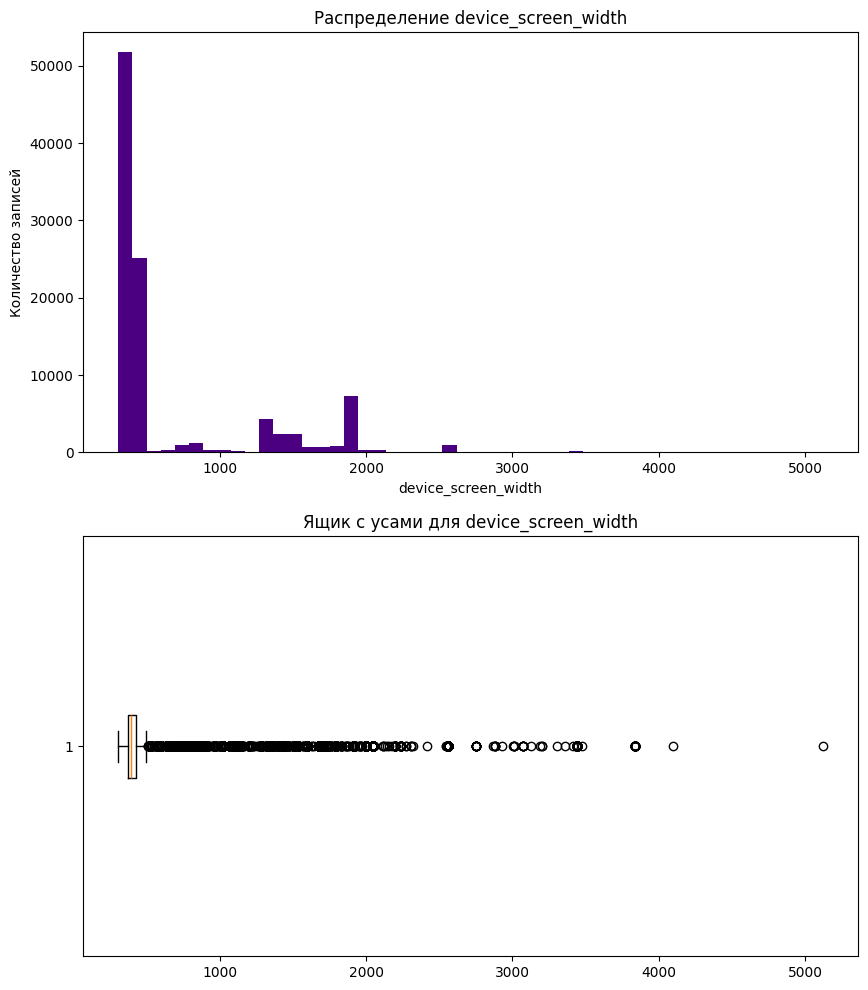

In [117]:
# Визаулизируем арспределение device_screen_width
fig, (ax_hist, ax_box) = plt.subplots(ncols=1, nrows=2, figsize=(10,12))
ax_hist.ticklabel_format(style='plain') 
ax_hist.hist(sessions_df_cleaned['device_screen_width'], bins=50, color='indigo')
ax_hist.set_title('Распределение device_screen_width')
ax_hist.set_ylabel('Количество записей')
ax_hist.set_xlabel('device_screen_width')

ax_box.boxplot(sessions_df_cleaned['device_screen_width'], vert=False)
ax_box.set_title('Ящик с усами для device_screen_width')

Text(0.5, 1.0, 'Ящик с усами для device_screen_height')

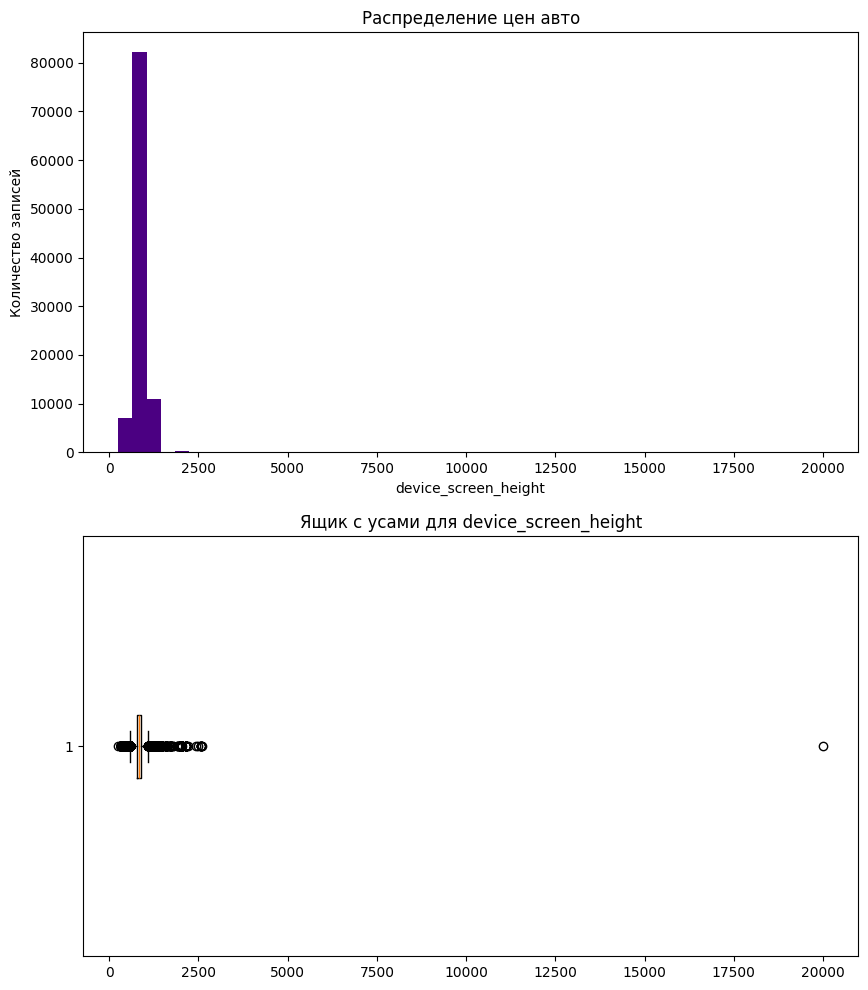

In [118]:
# Визаулизируем арспределение device_screen_height
fig, (ax_hist, ax_box) = plt.subplots(ncols=1, nrows=2, figsize=(10,12))
ax_hist.ticklabel_format(style='plain') 
ax_hist.hist(sessions_df_cleaned['device_screen_height'], bins=50, color='indigo')
ax_hist.set_title('Распределение цен авто')
ax_hist.set_ylabel('Количество записей')
ax_hist.set_xlabel('device_screen_height')

ax_box.boxplot(sessions_df_cleaned['device_screen_height'], vert=False)
ax_box.set_title('Ящик с усами для device_screen_height')

<b>Чистка от выбросов в device_screen_width и device_screen_height</b>

In [119]:
def get_boundaries(datacol):
    # datacol - колонка с числами из датафрейма (в виде датафрейма)
    # datacol.mean() - среднее арифмитическое
    # datacol.std() - среднеквадратическое отклонение
	minimum = datacol.mean() - 3 * datacol.std()  
	maximum = datacol.mean() + 3 * datacol.std()
	boundaries = (minimum, maximum)
	return boundaries



Процент выбросов от общего числа записей (device_screen_widthб device_screen_height) :

In [120]:

boundaries_w = get_boundaries(sessions_df_cleaned['device_screen_width'])

#Подсчитаем количество значений, которые больше верхней границы или меньше нижней границы
is_outlier_w = (sessions_df_cleaned['device_screen_width'] < boundaries_w[0]) | (sessions_df_cleaned['device_screen_width'] > boundaries_w[1])

is_outlier_w.sum() / sessions_df_cleaned.shape[0] # процент выбросов относительно общего количества записей в датасете

# sessions_df_cleaned['device_screen_height'].describe().apply(lambda x: format(x, 'f'))

0.011260544325958936

In [121]:
boundaries_h = get_boundaries(sessions_df_cleaned['device_screen_height'])
#Подсчитаем количество значений, которые больше верхней границы или меньше нижней границы
is_outlier_h = (sessions_df_cleaned['device_screen_height'] < boundaries_h[0]) | (sessions_df_cleaned['device_screen_height'] > boundaries_h[1])

is_outlier_h.sum() / sessions_df_cleaned.shape[0] # процент выбросов относительно общего количества записей в датасете

0.014214945089925195

<b>Избавляемся от выбросов приравняв к границам</b>

In [122]:

sessions_df_cleaned.loc[(sessions_df_cleaned.device_screen_width < boundaries_w[0]), ['device_screen_width']] = round(boundaries_w[0])
sessions_df_cleaned.loc[(sessions_df_cleaned.device_screen_width > boundaries_w[1]), ['device_screen_width']] = round(boundaries_w[1])

sessions_df_cleaned.loc[(sessions_df_cleaned.device_screen_height < boundaries_h[0]), ['device_screen_height']] = round(boundaries_h[0])
sessions_df_cleaned.loc[(sessions_df_cleaned.device_screen_height > boundaries_h[1]), ['device_screen_height']] = round(boundaries_h[1])


is_outlier_w = (sessions_df_cleaned.device_screen_width < boundaries_w[0]) | (sessions_df_cleaned.device_screen_width > boundaries_w[1])
w_percent = is_outlier_w.sum() / sessions_df_cleaned.shape[0] # процент выбросов относительно общего количества записей в датасете
print("device_screen_width out boundaries percent: ", round(w_percent, 3))
is_outlier_h = (sessions_df_cleaned['device_screen_height'] < boundaries_h[0]) | (sessions_df_cleaned['device_screen_height'] > boundaries_h[1])
h_percent = is_outlier_h.sum() / sessions_df_cleaned.shape[0] # процент выбросов относительно общего количества записей в датасете
print("device_screen_height out boundaries percent: ", round(h_percent, 3))

# [v]

device_screen_width out boundaries percent:  0.011
device_screen_height out boundaries percent:  0.001


Text(0.5, 0, 'device_screen_height')

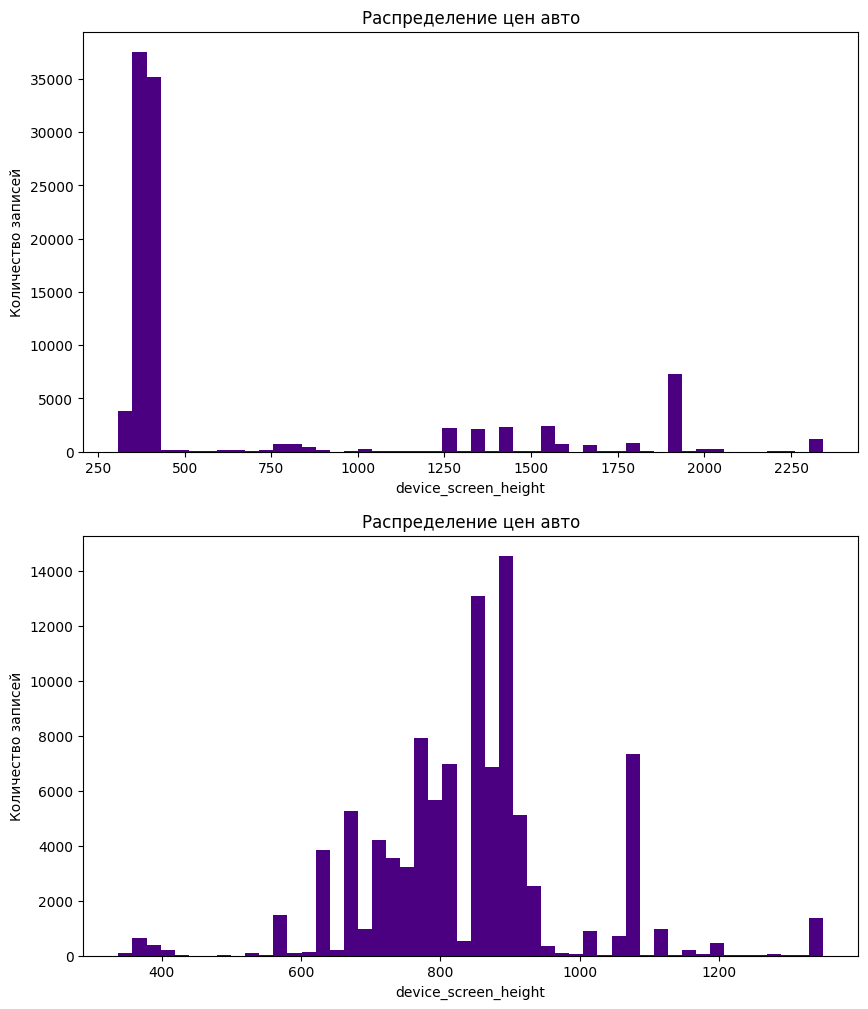

In [123]:
fig, (ax_hist_w, ax_hist_h) = plt.subplots(ncols=1, nrows=2, figsize=(10,12))
ax_hist_w.ticklabel_format(style='plain') 
ax_hist_w.hist(sessions_df_cleaned['device_screen_width'], bins=50, color='indigo')
ax_hist_w.set_title('Распределение цен авто')
ax_hist_w.set_ylabel('Количество записей')
ax_hist_w.set_xlabel('device_screen_height')

ax_hist_h.ticklabel_format(style='plain') 
ax_hist_h.hist(sessions_df_cleaned['device_screen_height'], bins=50, color='indigo')
ax_hist_h.set_title('Распределение цен авто')
ax_hist_h.set_ylabel('Количество записей')
ax_hist_h.set_xlabel('device_screen_height')


После извлечения данных удаление колонку 'device_screen_resolution'

In [124]:

sessions_df_cleaned.drop(columns=['device_screen_resolution'], inplace=True)

sessions_df_cleaned.shape

(100528, 14)

#### Приведение типов

In [125]:
sessions_df_typed = sessions_df_cleaned.copy()
sessions_df_typed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100528 entries, 0 to 100527
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   utm_source            100528 non-null  object
 1   utm_campaign          100528 non-null  object
 2   utm_adcontent         100528 non-null  object
 3   utm_keyword           100528 non-null  object
 4   device_category       100528 non-null  object
 5   device_os             100528 non-null  object
 6   device_brand          100528 non-null  object
 7   device_browser        100528 non-null  object
 8   geo_country           100528 non-null  object
 9   geo_city              100528 non-null  object
 10  conversion_rate       100528 non-null  int64 
 11  is_organic_visit      100528 non-null  int64 
 12  device_screen_width   100528 non-null  int64 
 13  device_screen_height  100528 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 10.7+ MB


In [126]:
del sessions_df_cleaned

##### Категории - Преоброзование подходящих колонок в категории

In [127]:
for col in sessions_df_typed.columns:
    print('Характеристика: ', col, '\nКоличество уникальных значений: ', sessions_df_typed[col].nunique())
    print("----======------")

Характеристика:  utm_source 
Количество уникальных значений:  54
----======------
Характеристика:  utm_campaign 
Количество уникальных значений:  140
----======------
Характеристика:  utm_adcontent 
Количество уникальных значений:  61
----======------
Характеристика:  utm_keyword 
Количество уникальных значений:  142
----======------
Характеристика:  device_category 
Количество уникальных значений:  3
----======------
Характеристика:  device_os 
Количество уникальных значений:  7
----======------
Характеристика:  device_brand 
Количество уникальных значений:  37
----======------
Характеристика:  device_browser 
Количество уникальных значений:  12
----======------
Характеристика:  geo_country 
Количество уникальных значений:  38
----======------
Характеристика:  geo_city 
Количество уникальных значений:  248
----======------
Характеристика:  conversion_rate 
Количество уникальных значений:  2
----======------
Характеристика:  is_organic_visit 
Количество уникальных значений:  2
----====

Список категориальных колонок (categorical_columns)

In [128]:
categorical_columns = ['conversion_rate', 'utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 
                       'device_category', 'device_os', 'device_brand', 'device_browser', 'geo_country', 'geo_city', 
                       'is_organic_visit']

In [129]:
print(sessions_df_typed[categorical_columns].info())

# Приведением колонок из categorical_columns в тип category
sessions_df_typed[categorical_columns] = sessions_df_typed[categorical_columns].apply(lambda col: col.astype('category'))

sessions_df_typed[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100528 entries, 0 to 100527
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   conversion_rate   100528 non-null  int64 
 1   utm_source        100528 non-null  object
 2   utm_campaign      100528 non-null  object
 3   utm_adcontent     100528 non-null  object
 4   utm_keyword       100528 non-null  object
 5   device_category   100528 non-null  object
 6   device_os         100528 non-null  object
 7   device_brand      100528 non-null  object
 8   device_browser    100528 non-null  object
 9   geo_country       100528 non-null  object
 10  geo_city          100528 non-null  object
 11  is_organic_visit  100528 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 9.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100528 entries, 0 to 100527
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------    

## Data Visualization

Convertation Rate - Совершил ли пользователь целевое действие<br> 1 - да, 0 - нет

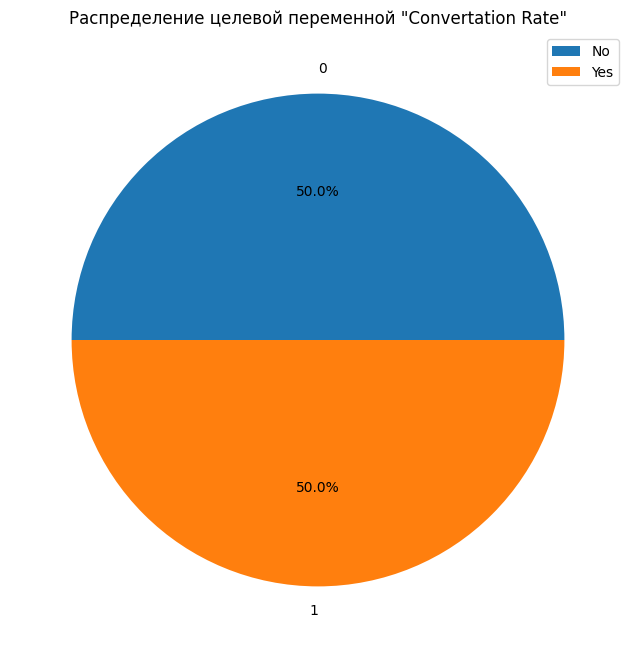

In [130]:
sessions_df_typed['conversion_rate'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Распределение целевой переменной "Convertation Rate"')
plt.legend(['No', 'Yes'])
plt.ylabel('')
plt.show()

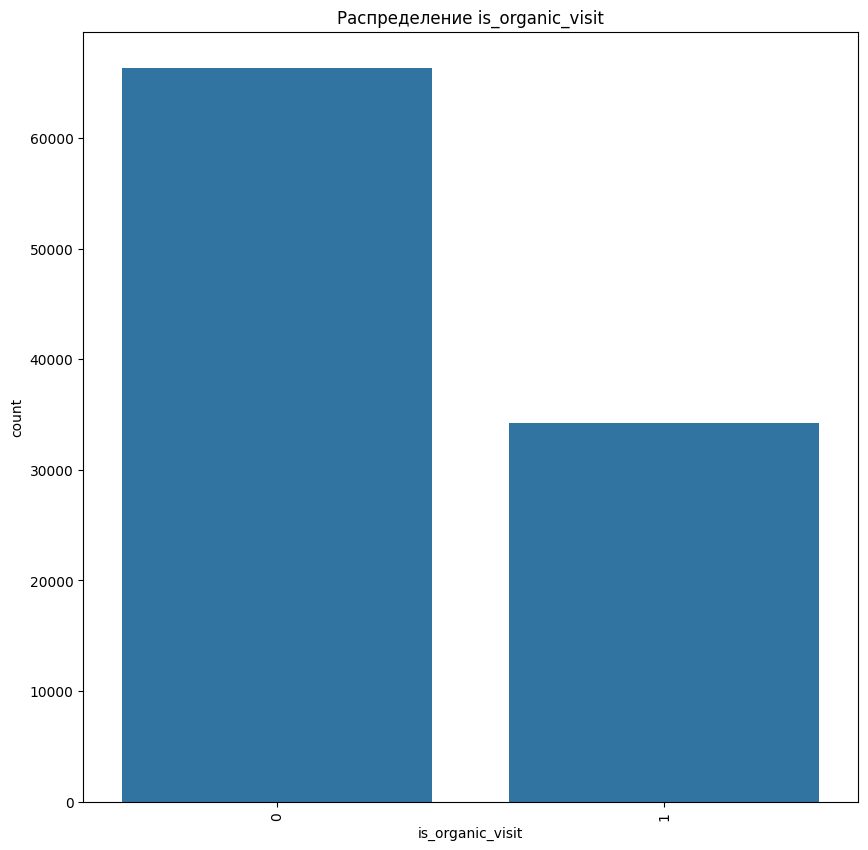

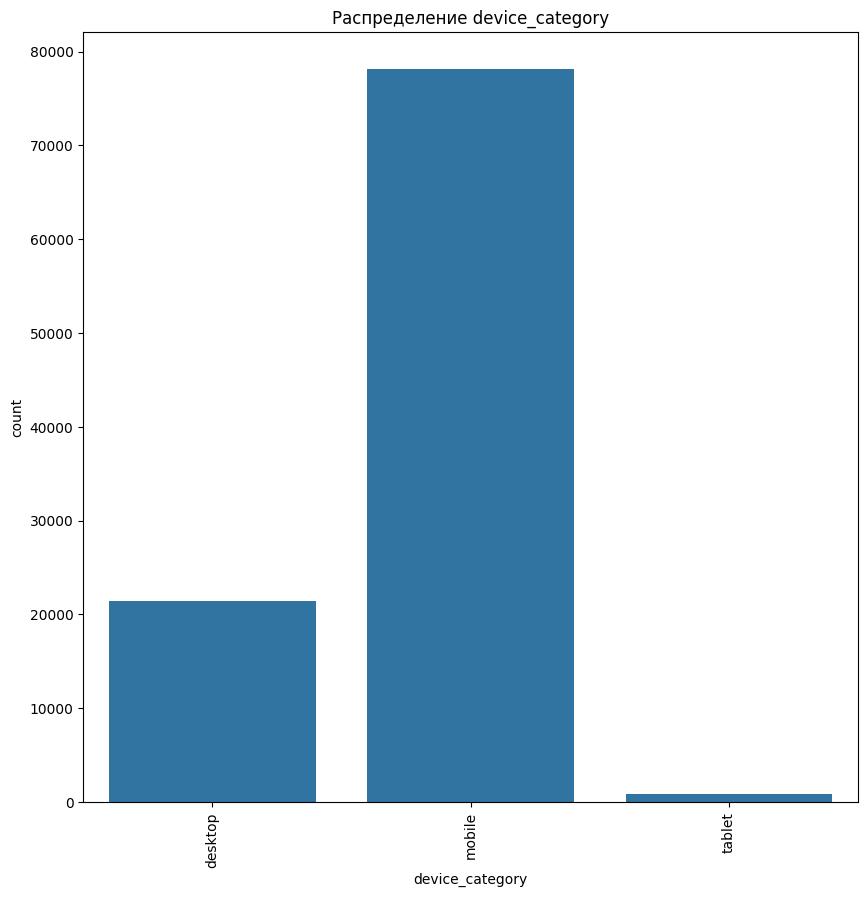

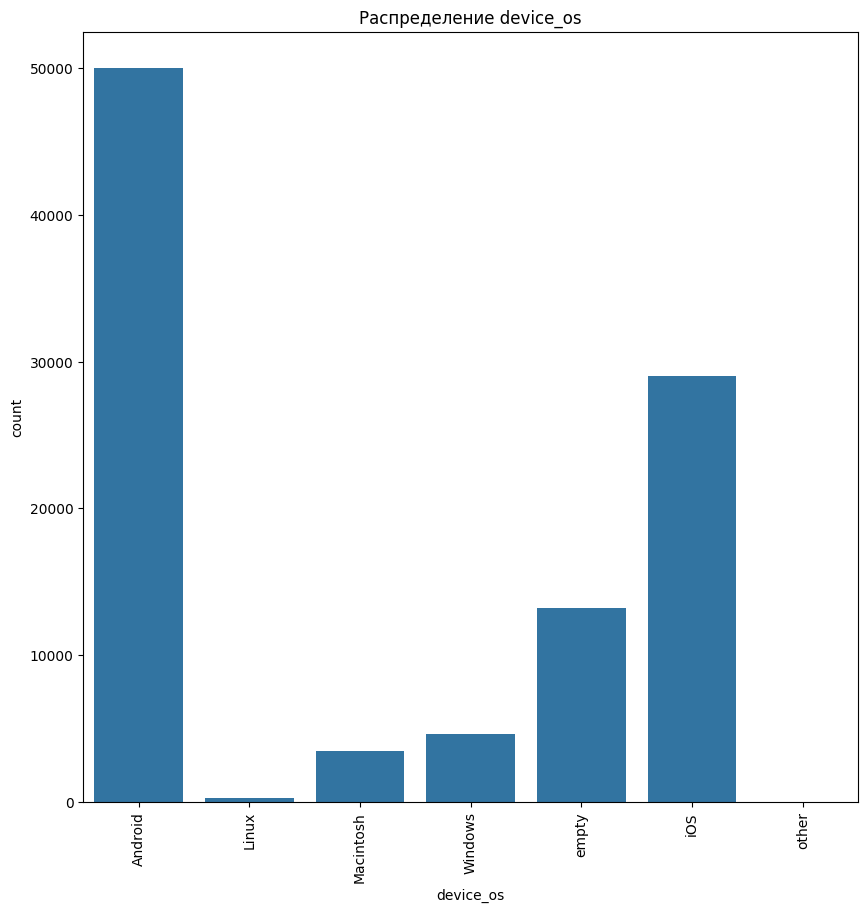

In [131]:
categorical_columns = ['is_organic_visit', 'device_category', 'device_os']

for col in categorical_columns:
    plt.figure(figsize=(10, 10))
    plt.ticklabel_format(style='plain')
    sns.countplot(data=sessions_df_typed, x=col)    
    plt.title(f'Распределение {col}')
    plt.xticks(rotation=90)    
    plt.show()

Text(0.5, 0, 'Количество записей')

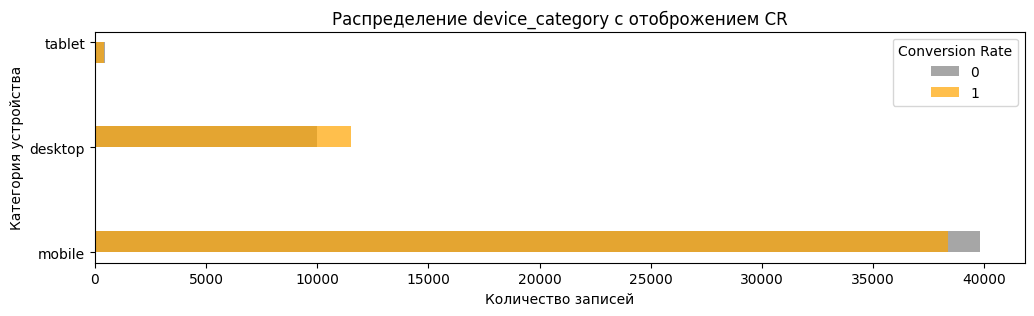

In [132]:
colors = {0: 'grey', 1: 'orange'}
fig, ax_multihist = plt.subplots(ncols=1, nrows=1,figsize=(12,3))
ax_multihist.ticklabel_format(style='plain') 
for category in colors:
    # print(category)
    conversy_by_cat = sessions_df_typed[sessions_df_typed['conversion_rate'] == category]
    ax_multihist.hist(conversy_by_cat['device_category'], color=colors[category], alpha=0.7, orientation='horizontal')
   
ax_multihist.legend(colors, title='Conversion Rate')
ax_multihist.set_title('Распределение device_category с отоброжением CR')
ax_multihist.set_ylabel('Категория устройства')
ax_multihist.set_xlabel('Количество записей')

## Feature engineering

перед тем как приступить к futer engiineering сохраним очищенный датафрейм в файл cleaning_session_df.csv

In [133]:
# Сохраним в файл после чистки и приведения типов
sessions_df_typed.to_csv('tmp/cleaning_session_df_0.2.csv', index=False)

In [134]:
del sessions_df_typed

In [135]:
# Загрузка файлов
sessions_df_new = pd.read_csv("tmp/cleaning_session_df_0.2.csv")
sessions_df_new.isna().sum()


utm_source              0
utm_campaign            0
utm_adcontent           0
utm_keyword             0
device_category         0
device_os               0
device_brand            0
device_browser          0
geo_country             0
geo_city                0
conversion_rate         0
is_organic_visit        0
device_screen_width     0
device_screen_height    0
dtype: int64

### Создание новых признаков

I) Из колонок разрешение экрана ('device_screen_width' 'device_screen_height') можно достать фитчи: 
<ul>
<li>1. Мегапиксели экрана = Количество пикселей / 1000000</li>
<li>2. Ориентацию экрана (вертикальная, горизонтальная)</li>
</ul>

II) из geo_country:
так как услугу автоподписки возможно получить только в России, Можно сделать параметр from_russia с значениеми 1 или 0.
<br>
III) из geo_city:
Так как машину по подписке можно получить в Москве, мы можем достать кординаты москвы и определить растояние фитчи geo_city до Москвы у каждого посетителя
<br><br>
IV) Р
Реклама в социальных сетях — все визиты с ga_sessions.utm_source in ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm').

#### Создадим признак 'is_socialmedia_advert' - Реклама в социальных сетях на основе данных из utm_source и ТЗ

Создадим новую колонку ['is_socialmedia_advert']<br>где 'is_socialmedia_advert' = 1 при utm_source == ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm') и 0 при других случаях

In [136]:
sessions_df_new

,utm_source,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,conversion_rate,is_organic_visit,device_screen_width,device_screen_height
0,ZpYIoDJMcFzVoPFsHGJL,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,empty,mobile,Android,Huawei,Chrome,Russia,Moscow,1,0,320,694
1,MvfHsxITijuriZxsqZqt,qUcotcWimEOQiboVPcCx,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Russia,Vidnoye,0,0,414,896
2,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Russia,Grozny,0,0,375,812
3,kjsLglQLzykiRbcDiGcD,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,XEayFbemrPYbxFeNbxif,desktop,Windows,empty,Chrome,Russia,Moscow,0,0,2048,1152
4,BHcvLfOaCWvWTykYqHVe,empty,empty,empty,desktop,empty,empty,Chrome,Russia,empty,0,0,1536,864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100523,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,other,mobile,iOS,Apple,Safari,Russia,Moscow,0,0,414,896
100524,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Russia,Odintsovo,0,1,375,667
100525,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Russia,Nizhny Novgorod,0,0,375,667
100526,aXQzDWsJuGXeBXexNHjc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,desktop,empty,empty,Firefox,Russia,empty,0,1,1366,768


In [137]:
is_socmedia_advert = ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm')
sessions_df_new['is_socialmedia_advert'] = sessions_df_new['utm_source'].apply(lambda u: 1 if u in is_socmedia_advert else 0)
sessions_df_new[sessions_df_new['utm_source'].isin(is_socmedia_advert)]['is_socialmedia_advert'].value_counts()

is_socialmedia_advert
1    11421
Name: count, dtype: int64

#### Работа с Разрешением экрана 'device_screen_width' 'device_screen_height':

Создадим колонку <b>device_pixel_count</b> которая равна width * height

In [138]:
sessions_df_new['device_display_megapixel'] = round(sessions_df_new['device_screen_width'] * sessions_df_new['device_screen_height'] / 1000000, 2)

print(sessions_df_new['device_display_megapixel'].describe().apply(lambda x: format(x, 'f')))
sessions_df_new[['device_display_megapixel', 'device_screen_width', 'device_screen_height']]
# [v]

count    100528.000000
mean          0.604687
std           0.618077
min           0.150000
25%           0.280000
50%           0.330000
75%           0.390000
max           3.160000
Name: device_display_megapixel, dtype: object


,device_display_megapixel,device_screen_width,device_screen_height
0,0.22,320,694
1,0.37,414,896
2,0.30,375,812
3,2.36,2048,1152
4,1.33,1536,864
...,...,...,...
100523,0.37,414,896
100524,0.25,375,667
100525,0.25,375,667
100526,1.05,1366,768


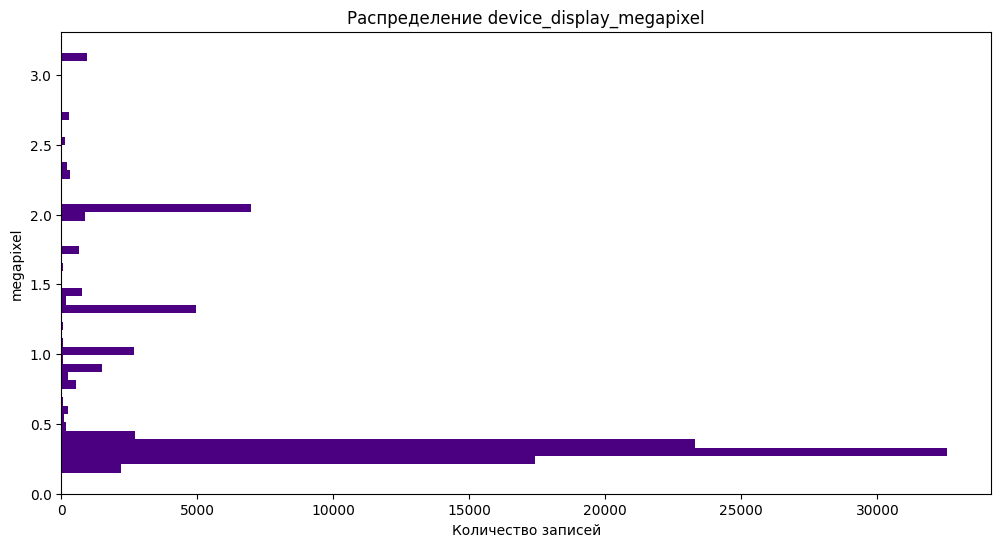

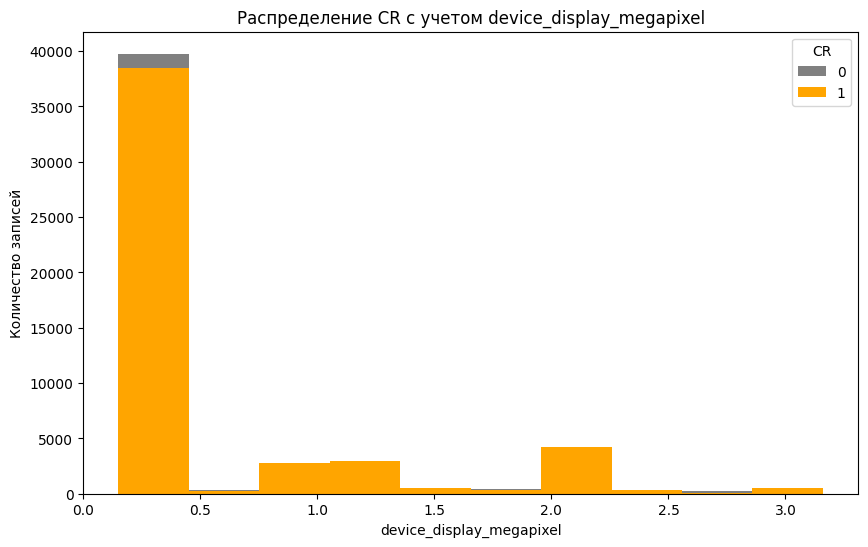

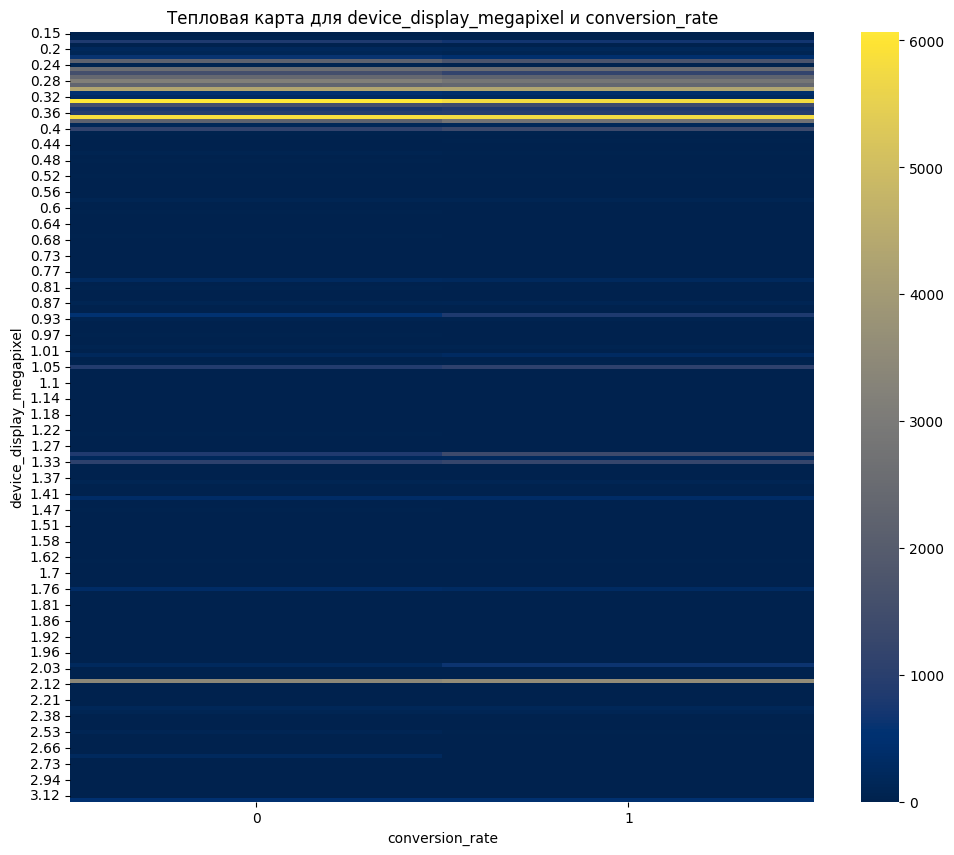

conversion_rate,0,1
device_display_megapixel,,
0.15,7,5
0.17,62,39
0.18,816,674
0.19,12,3
0.20,213,166
...,...,...
2.99,1,2
3.00,1,1
3.07,0,1


In [139]:
# Визаулизируем арспределение device_pixel_count
fig, (ax_hist) = plt.subplots(figsize=(12,6))
ax_hist.ticklabel_format(style='plain') 
ax_hist.hist(sessions_df_new['device_display_megapixel'], bins=50, color='indigo', orientation='horizontal')
ax_hist.set_title('Распределение device_display_megapixel')
ax_hist.set_ylabel('megapixel')
ax_hist.set_xlabel('Количество записей')


conversion_rate = {0: 'grey', 1: 'orange'}
fig, ax_hist = plt.subplots(figsize=(10,6))
ax_hist.set_title('Распределение CR с учетом device_display_megapixel')
for cat in conversion_rate:
    ax_hist.hist(sessions_df_new[(sessions_df_new['conversion_rate'] == cat) ]['device_display_megapixel'], color=conversion_rate[cat], bins=10)
ax_hist.set_ylabel('Количество записей')
ax_hist.set_xlabel('device_display_megapixel')
ax_hist.legend(conversion_rate, title='CR')

# Создание кросс-таблицы
crosstab = pd.crosstab(sessions_df_new['device_display_megapixel'], sessions_df_new['conversion_rate'])

# Визуализация тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(crosstab, cmap='cividis')

plt.title('Тепловая карта для device_display_megapixel и conversion_rate')
plt.show()
crosstab

Определим ориентацию дисплея (вертикальная, горизонтальная). <br><b>Создадим новую колонку 'device_orientation_vertical'</b> при вертикальной ориентации значение равно 1 в другом случае 0

In [140]:


sessions_df_new['device_orientation_vertical'] = sessions_df_new.apply(lambda x: 1 if x['device_screen_width']<x['device_screen_height'] else 0, axis=1)

sessions_df_new[['device_orientation_vertical', 'device_screen_width', 'device_screen_height']]

# [v]


,device_orientation_vertical,device_screen_width,device_screen_height
0,1,320,694
1,1,414,896
2,1,375,812
3,0,2048,1152
4,0,1536,864
...,...,...,...
100523,1,414,896
100524,1,375,667
100525,1,375,667
100526,0,1366,768


Text(0.5, 0, 'Количество записей')

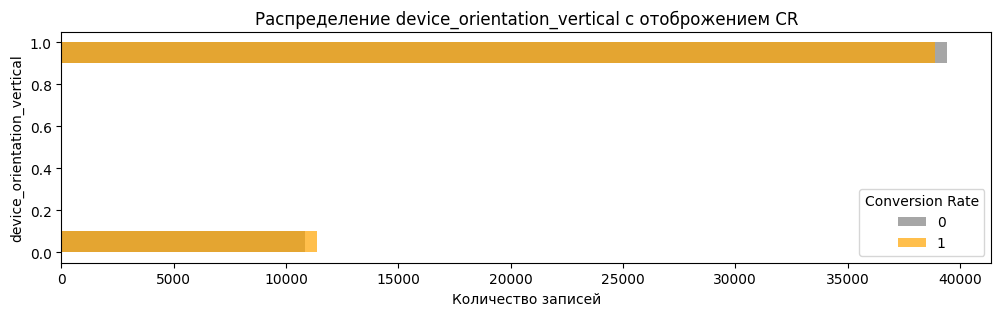

In [141]:
colors = {0: 'grey', 1: 'orange'}
fig, ax_multihist = plt.subplots(ncols=1, nrows=1,figsize=(12,3))
ax_multihist.ticklabel_format(style='plain') 
for category in colors:
    # print(category)
    conversy_by_cat = sessions_df_new[sessions_df_new['conversion_rate'] == category]
    ax_multihist.hist(conversy_by_cat['device_orientation_vertical'], color=colors[category], alpha=0.7, orientation='horizontal')
   
ax_multihist.legend(colors, title='Conversion Rate')
ax_multihist.set_title('Распределение device_orientation_vertical с отоброжением CR')
ax_multihist.set_ylabel('device_orientation_vertical')
ax_multihist.set_xlabel('Количество записей')

#### Работаем с geo_country создадим параметр from_russia

In [142]:
sessions_df_new['geo_country'].value_counts()

geo_country
Russia                  97848
Ukraine                   443
United States             315
other                     237
Belarus                   179
Germany                   140
Kazakhstan                113
Turkey                     95
United Kingdom             94
Netherlands                88
Uzbekistan                 87
Kyrgyzstan                 70
empty                      70
Sweden                     68
Ireland                    55
Georgia                    52
France                     48
Cyprus                     45
Spain                      40
Finland                    38
Armenia                    37
Morocco                    35
United Arab Emirates       31
Poland                     31
Estonia                    26
Israel                     25
Latvia                     24
Moldova                    23
Tajikistan                 20
Italy                      20
Greece                     19
Bulgaria                   19
Azerbaijan                 1

In [143]:
# создаем новую колонку ['from_russia'] на основе параметра geo_country
sessions_df_new['from_russia'] = sessions_df_new['geo_country'].apply(lambda x: 1 if x == 'Russia'  else 0)

print(sessions_df_new.loc[sessions_df_new['geo_country'] == 'Russia'][['from_russia', 'geo_country']])
print(sessions_df_new.loc[sessions_df_new['geo_country'] != 'Russia'][['from_russia', 'geo_country']])

sessions_df_new['from_russia'] = sessions_df_new['from_russia'].astype('category')
# Удаляем geo_country
sessions_df_new.drop(columns=['geo_country'], inplace=True)

        from_russia geo_country
0                 1      Russia
1                 1      Russia
2                 1      Russia
3                 1      Russia
4                 1      Russia
...             ...         ...
100523            1      Russia
100524            1      Russia
100525            1      Russia
100526            1      Russia
100527            1      Russia

[97848 rows x 2 columns]
        from_russia     geo_country
30                0           empty
82                0        Bulgaria
94                0     Netherlands
118               0         Finland
121               0  United Kingdom
...             ...             ...
100372            0         Ukraine
100382            0   United States
100386            0   United States
100392            0     Netherlands
100443            0         Ukraine

[2680 rows x 2 columns]


#### На основе 'geo_city' получаем новые данные о городе

Необходимо определять координаты по названию города и высчитать растояние до Москвы по координатам.
<br>
Для этого нам надо создать DataFrame с координатами городов 

Имена городов встречаются на Английском и Русском в дальнейшем учтем что нам надо хранить альтернативные названия

In [144]:
sessions_df_new.loc[sessions_df_new['from_russia'] == 1]['geo_city'].shape[0]

97848

Так как услугу автоподписка можно взять лиш в Москве и являясь клиентов Российского банка. Имеет смысл приравнять все города кроме Российских

In [145]:
print(sessions_df_new['geo_city'].nunique())
sessions_df_new.loc[sessions_df_new['from_russia'] == 0, 'geo_city'] = 'other'
sessions_df_new['geo_city'].nunique()

# [v]


248


207

#### Создадим базу с названиями городов и их координатами

In [146]:
# достаем данные из файла city.csv
cities_df = pd.read_csv("cities_data/city.csv")
# убеждаемся что не будет пустот в колонке с названием города
cities_df = cities_df[~cities_df['city'].isna()]


cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 0 to 1116
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           1103 non-null   object 
 1   postal_code       1102 non-null   float64
 2   country           1103 non-null   object 
 3   federal_district  1103 non-null   object 
 4   region_type       1103 non-null   object 
 5   region            1103 non-null   object 
 6   area_type         601 non-null    object 
 7   area              601 non-null    object 
 8   city_type         1103 non-null   object 
 9   city              1103 non-null   object 
 10  settlement_type   1 non-null      object 
 11  settlement        1 non-null      object 
 12  kladr_id          1103 non-null   int64  
 13  fias_id           1103 non-null   object 
 14  fias_level        1103 non-null   int64  
 15  capital_marker    1103 non-null   int64  
 16  okato             1103 non-null   int64  
 17  

In [147]:
# Оставим только нужные нам колонки
cities_df = cities_df[['city', 'timezone', 'geo_lat', 'geo_lon', 'population']]

# Избавимся от одинаковых названий, оставляя данные о городе с наибольшим населением 
cities_df = cities_df.loc[cities_df.groupby('city')['population'].idxmax()]
cities_df

,city,timezone,geo_lat,geo_lon,population
1016,Абаза,UTC+7,52.651665,90.088569,17111
1017,Абакан,UTC+7,53.722333,91.443672,165183
659,Абдулино,UTC+5,53.677891,53.647248,20663
371,Абинск,UTC+3,44.867965,38.161816,34926
44,Агидель,UTC+5,55.899906,53.922014,16365
...,...,...,...,...,...
1116,Ярославль,UTC+3,57.621548,39.897741,591486
887,Ярцево,UTC+3,55.056473,32.690230,47853
986,Ясногорск,UTC+3,54.479548,37.689605,16804
670,Ясный,UTC+5,51.036838,59.874344,16082


In [148]:
# проверяем нет ли пустых значений в нужных нам колонках 
isna_percent = round(cities_df.isna().sum() / cities_df.shape[0] * 100, 5)  #  Процент пустых значений
print(isna_percent[isna_percent>0].sort_values(ascending=False))  #  Вывод процента пустых по убыванию

Series([], dtype: float64)


В нашей базе городов не хватает названий на английском

In [149]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Russia'
wiki_rucities_df = pd.read_html(url)[0]
wiki_rucities_df.rename(columns={'City': 'city_eng', 'Russian name': 'city'}, inplace=True)
print(wiki_rucities_df.shape)
print(wiki_rucities_df.info())
# Проверка на пустые значения
wiki_rucities_df[wiki_rucities_df['city_eng'].isna() | wiki_rucities_df['city'].isna()]


(1115, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city_eng         1115 non-null   object
 1   city             1115 non-null   object
 2   Federal subject  1115 non-null   object
dtypes: object(3)
memory usage: 26.3+ KB
None


,city_eng,city,Federal subject


In [150]:
# Удаление дубликатов на основе столбца 'city', оставляя первую встреченную строку
wiki_rucities_df = wiki_rucities_df.drop_duplicates(subset='city_eng', keep='first')
wiki_rucities_df['city_eng'].value_counts()

city_eng
Abakan         1
Rossosh        1
Ruza           1
Rudnya         1
Rubtsovsk      1
              ..
Koryazhma      1
Kosteryovo     1
Kostomuksha    1
Kostroma       1
Zverevo        1
Name: count, Length: 1094, dtype: int64

In [151]:
cities_df = pd.merge(cities_df, wiki_rucities_df[['city_eng', 'city']], on='city')
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        1037 non-null   object 
 1   timezone    1037 non-null   object 
 2   geo_lat     1037 non-null   float64
 3   geo_lon     1037 non-null   float64
 4   population  1037 non-null   int64  
 5   city_eng    1037 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 48.7+ KB


In [152]:
print("Пустых значений в city_eng", cities_df[(cities_df['city_eng'].isna())].shape[0])
print("Пустых значений в geo_lat, geo_lon", cities_df[(cities_df['geo_lat'].isna()) | (cities_df['geo_lon'].isna())].shape[0])

Пустых значений в city_eng 0
Пустых значений в geo_lat, geo_lon 0


In [153]:
# Преоброзуем колонку UTC в float (5.0, -2.0)
cities_df['timezone'] = cities_df['timezone'].str.replace('UTC', '').astype(float)
cities_df['timezone']

0       7.0
1       7.0
2       5.0
3       3.0
4       5.0
       ... 
1032    3.0
1033    3.0
1034    3.0
1035    5.0
1036    3.0
Name: timezone, Length: 1037, dtype: float64

In [154]:
cities_df

,city,timezone,geo_lat,geo_lon,population,city_eng
0,Абаза,7.0,52.651665,90.088569,17111,Abaza
1,Абакан,7.0,53.722333,91.443672,165183,Abakan
2,Абдулино,5.0,53.677891,53.647248,20663,Abdulino
3,Абинск,3.0,44.867965,38.161816,34926,Abinsk
4,Агидель,5.0,55.899906,53.922014,16365,Agidel
...,...,...,...,...,...,...
1032,Ярославль,3.0,57.621548,39.897741,591486,Yaroslavl
1033,Ярцево,3.0,55.056473,32.690230,47853,Yartsevo
1034,Ясногорск,3.0,54.479548,37.689605,16804,Yasnogorsk
1035,Ясный,5.0,51.036838,59.874344,16082,Yasny


In [155]:
# Открываем еще один файл с городами и данными о них. 
df_cities_2 = pd.read_csv("cities_data/geonames-all-cities-with-a-population-1000.csv", sep=';')
print(df_cities_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Geoname ID               4711 non-null   int64  
 1   Name                     4711 non-null   object 
 2   ASCII Name               4710 non-null   object 
 3   Alternate Names          4702 non-null   object 
 4   Feature Class            4711 non-null   object 
 5   Feature Code             4711 non-null   object 
 6   Country Code             4711 non-null   object 
 7   Country name EN          4711 non-null   object 
 8   Country Code 2           2 non-null      object 
 9   Admin1 Code              4711 non-null   int64  
 10  Admin2 Code              311 non-null    object 
 11  Admin3 Code              15 non-null     float64
 12  Admin4 Code              0 non-null      float64
 13  Population               4711 non-null   int64  
 14  Elevation               

In [156]:
# Оставляем нужные нам колонки
df_cities_2 = df_cities_2[['Name', 'Alternate Names', 'Population', 'Timezone', 'Coordinates']]

# Избавимся от одинаковых названий, оставляя данные о городе с наибольшим населением 
df_cities_2 = df_cities_2.loc[df_cities_2.groupby('Name')['Population'].idxmax()]
df_cities_2

,Name,Alternate Names,Population,Timezone,Coordinates
2505,Abadzekhskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,Europe/Moscow,"44.39389, 40.22139"
955,Abagur,"Abagur,Abinskaya,Абагур",6530,Asia/Novokuznetsk,"53.7308, 87.2526"
649,Abakan,"ABA,Abakan,Abakan shaary,Abakana,Abakanas,Abak...",184168,Asia/Krasnoyarsk,"53.71556, 91.42917"
648,Abalak,"Abalak,Abalakskoye,Абалак",13555,Asia/Yekaterinburg,"58.12861, 68.59444"
311,Aban,"Aban,Alban,aban krasnwyarsk dyary,aban krasn...",9670,Asia/Krasnoyarsk,"56.6787, 96.0658"
...,...,...,...,...,...
4030,Zyryanka,"Novaya Zyryanka,Syrjanka,ZKP,Ziranka,Zirjanka,...",3627,Asia/Magadan,"65.73489, 150.89429"
4484,Zyryanskoye,"Zyrjanskoe,Zyrjanskoje,Zyryanskoye,Зырянское",6285,Asia/Tomsk,"56.83058, 86.62734"
172,Zyukayka,"Ziukajka,Zjukajka,Zyukayka,Зюкайка",4556,Asia/Yekaterinburg,"58.20416, 54.70784"
2359,Zyuzel’skiy,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,Asia/Yekaterinburg,"56.4856, 60.1331"


Название и содержание колонок в df_cities и df_cities_2 надо привести к одному стандарту

In [157]:
# Название и содержание колонок в df_cities и df_cities_2 надо привести к одному стандарту

# Переименуем колонки в cities_df
cities_df.rename(columns={'city_eng': 'Name', 'city': 'Alternate Names', 'timezone': 'Timezone', 
                          'population': 'Population', 'geo_lat': 'Geo_lat', 'geo_lon': 'Geo_long'}, inplace=True)
print(cities_df.info())

# В df_cities_2 ширина и долгота хранятся в одной колонке, разделим их
df_cities_2['Geo_lat'] = pd.to_numeric(df_cities_2['Coordinates'].apply(lambda x: x.split(', ')[0]))
df_cities_2['Geo_long'] = pd.to_numeric(df_cities_2['Coordinates'].apply(lambda x: x.split(', ')[1]))

print(df_cities_2.info())
df_cities_2[['Geo_lat', 'Geo_long', 'Coordinates']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alternate Names  1037 non-null   object 
 1   Timezone         1037 non-null   float64
 2   Geo_lat          1037 non-null   float64
 3   Geo_long         1037 non-null   float64
 4   Population       1037 non-null   int64  
 5   Name             1037 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 48.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4346 entries, 2505 to 1692
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4346 non-null   object 
 1   Alternate Names  4339 non-null   object 
 2   Population       4346 non-null   int64  
 3   Timezone         4346 non-null   object 
 4   Coordinates      4346 non-null   object 
 5   Geo_lat          4346 non-n

,Geo_lat,Geo_long,Coordinates
2505,44.39389,40.22139,"44.39389, 40.22139"
955,53.73080,87.25260,"53.7308, 87.2526"
649,53.71556,91.42917,"53.71556, 91.42917"
648,58.12861,68.59444,"58.12861, 68.59444"
311,56.67870,96.06580,"56.6787, 96.0658"
...,...,...,...
4030,65.73489,150.89429,"65.73489, 150.89429"
4484,56.83058,86.62734,"56.83058, 86.62734"
172,58.20416,54.70784,"58.20416, 54.70784"
2359,56.48560,60.13310,"56.4856, 60.1331"


In [158]:
# Удалим колонку Coordinates из df_cities_2
df_cities_2.drop(columns=['Coordinates'], inplace=True)
df_cities_2

,Name,Alternate Names,Population,Timezone,Geo_lat,Geo_long
2505,Abadzekhskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,Europe/Moscow,44.39389,40.22139
955,Abagur,"Abagur,Abinskaya,Абагур",6530,Asia/Novokuznetsk,53.73080,87.25260
649,Abakan,"ABA,Abakan,Abakan shaary,Abakana,Abakanas,Abak...",184168,Asia/Krasnoyarsk,53.71556,91.42917
648,Abalak,"Abalak,Abalakskoye,Абалак",13555,Asia/Yekaterinburg,58.12861,68.59444
311,Aban,"Aban,Alban,aban krasnwyarsk dyary,aban krasn...",9670,Asia/Krasnoyarsk,56.67870,96.06580
...,...,...,...,...,...,...
4030,Zyryanka,"Novaya Zyryanka,Syrjanka,ZKP,Ziranka,Zirjanka,...",3627,Asia/Magadan,65.73489,150.89429
4484,Zyryanskoye,"Zyrjanskoe,Zyrjanskoje,Zyryanskoye,Зырянское",6285,Asia/Tomsk,56.83058,86.62734
172,Zyukayka,"Ziukajka,Zjukajka,Zyukayka,Зюкайка",4556,Asia/Yekaterinburg,58.20416,54.70784
2359,Zyuzel’skiy,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,Asia/Yekaterinburg,56.48560,60.13310


In [159]:

# Функция преоброзования название временной зоны в utc отклонение (3.0, -2.0)
def get_utcoffset_from_timezone(time_zone_name: str):
    tz = pytz.timezone(time_zone_name)
    dt = datetime.utcnow()
    
    offset_seconds = tz.utcoffset(dt).total_seconds()
    
    offset_hours = offset_seconds / 3600.0
    utc_offset = round(int(offset_hours)+float((offset_hours % 1)), 1)
    return utc_offset

get_utcoffset_from_timezone('Asia/Magadan')

11.0

In [160]:
df_cities_2['Timezone'] = pd.to_numeric(df_cities_2['Timezone'].apply(get_utcoffset_from_timezone))
df_cities_2['Timezone']

2505     3.0
955      7.0
649      7.0
648      5.0
311      7.0
        ... 
4030    11.0
4484     7.0
172      5.0
2359     5.0
1692     3.0
Name: Timezone, Length: 4346, dtype: float64

In [161]:
print(cities_df.info())
print(df_cities_2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alternate Names  1037 non-null   object 
 1   Timezone         1037 non-null   float64
 2   Geo_lat          1037 non-null   float64
 3   Geo_long         1037 non-null   float64
 4   Population       1037 non-null   int64  
 5   Name             1037 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 48.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4346 entries, 2505 to 1692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4346 non-null   object 
 1   Alternate Names  4339 non-null   object 
 2   Population       4346 non-null   int64  
 3   Timezone         4346 non-null   float64
 4   Geo_lat          4346 non-null   float64
 5   Geo_long         4346 non-n

Наши данные в двух датафреймах приведены к одному виду и типу (df_cities_2, df_cities).<br>
Можем обьеденить их в один датафрейм

In [162]:
print(df_cities_2.shape, cities_df.shape)
# Обьеденим подгтовленные Датафреймы в один по принципй full outer join
full_cities_df = pd.merge(df_cities_2, cities_df, on=cities_df.columns.to_list(), how='outer')
full_cities_df['Name'].value_counts()

(4346, 6) (1037, 6)


Name
Saransk                  2
Chapayevsk               2
Puchezh                  2
Ostrov                   2
Cherepovets              2
                        ..
Smirnykh                 1
Ketovo                   1
Kevsala                  1
Kez                      1
Ust’-Kamchatsk Staryy    1
Name: count, Length: 4531, dtype: int64

у нас есть дублкаты в Name, надо избавиться но сохранив Alternate Names так как там может храниться полезная информация

In [163]:

# у строк с одинаковым Name обабатываем ['Alternate Names'] конкетинируем если они разные и не пустые.
full_cities_df['Alternate Names'] = full_cities_df.groupby('Name')['Alternate Names'].transform(lambda x: ','.join(x.dropna().unique()))

# Фильтруем дубликаты 'Name' и выбираем строки с наибольшим населением для каждого города
full_cities_df = full_cities_df.loc[full_cities_df.groupby('Name')['Population'].idxmax()].reset_index(drop=True)

full_cities_df['Name'].value_counts()

Name
Abadzekhskaya       1
Rozhdestveno        1
Rudnichnyy          1
Rudnaya Pristan’    1
Rubtsovsk           1
                   ..
Kostomuksha         1
Kostroma            1
Kostrovo            1
Kotelnich           1
Zyuzino             1
Name: count, Length: 4531, dtype: int64

In [164]:
full_cities_df

,Name,Alternate Names,Population,Timezone,Geo_lat,Geo_long
0,Abadzekhskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139
1,Abagur,"Abagur,Abinskaya,Абагур",6530,7.0,53.73080,87.25260
2,Abakan,"ABA,Abakan,Abakan shaary,Abakana,Abakanas,Abak...",184168,7.0,53.71556,91.42917
3,Abalak,"Abalak,Abalakskoye,Абалак",13555,5.0,58.12861,68.59444
4,Aban,"Aban,Alban,aban krasnwyarsk dyary,aban krasn...",9670,7.0,56.67870,96.06580
...,...,...,...,...,...,...
4526,Zyryanka,"Novaya Zyryanka,Syrjanka,ZKP,Ziranka,Zirjanka,...",3627,11.0,65.73489,150.89429
4527,Zyryanskoye,"Zyrjanskoe,Zyrjanskoje,Zyryanskoye,Зырянское",6285,7.0,56.83058,86.62734
4528,Zyukayka,"Ziukajka,Zjukajka,Zyukayka,Зюкайка",4556,5.0,58.20416,54.70784
4529,Zyuzel’skiy,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,5.0,56.48560,60.13310


Теперь можно посчитать растояние каждого города до Москвы.<br>
Создадим новую колонку 'km_to_moscow' в которой будем хранить растояние до Москвы в километрах

используем формулу гаверсинусов:

In [165]:


def get_distance_to_mscow(row, moscow_coords):
    # Конвертируем градусы в радианы
    lat1 = radians(row.Geo_lat)
    lon1 = radians(row.Geo_long)
    lat2 = radians(moscow_coords[0])
    lon2 = radians(moscow_coords[1])

    # Радиус Земли в километрах
    R = 6371.0

    # Разница между широтами и долготами
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Формула гаверсинусов для вычисления расстояния между двумя точками
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Расстояние между двумя точками
    distance_km = round(R * c, 2)
    return distance_km

# Координаты Москвы (широта, долгота)
moscow_coords = (full_cities_df.loc[full_cities_df['Name'] == 'Moscow', 'Geo_lat'].values[0], 
                 full_cities_df.loc[full_cities_df['Name'] == 'Moscow', 'Geo_long'].values[0])

# Применяем функцию к каждой строке DataFrame
full_cities_df['km_to_moscow'] = full_cities_df.apply(get_distance_to_mscow, axis=1, args=(moscow_coords,))

full_cities_df.to_csv("cities_data/full_ru_cities_data.csv", index=False)
full_cities_df

,Name,Alternate Names,Population,Timezone,Geo_lat,Geo_long,km_to_moscow
0,Abadzekhskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
1,Abagur,"Abagur,Abinskaya,Абагур",6530,7.0,53.73080,87.25260,3125.43
2,Abakan,"ABA,Abakan,Abakan shaary,Abakana,Abakanas,Abak...",184168,7.0,53.71556,91.42917,3374.74
3,Abalak,"Abalak,Abalakskoye,Абалак",13555,5.0,58.12861,68.59444,1880.51
4,Aban,"Aban,Alban,aban krasnwyarsk dyary,aban krasn...",9670,7.0,56.67870,96.06580,3504.61
...,...,...,...,...,...,...,...
4526,Zyryanka,"Novaya Zyryanka,Syrjanka,ZKP,Ziranka,Zirjanka,...",3627,11.0,65.73489,150.89429,5396.68
4527,Zyryanskoye,"Zyrjanskoe,Zyrjanskoje,Zyryanskoye,Зырянское",6285,7.0,56.83058,86.62734,2961.76
4528,Zyukayka,"Ziukajka,Zjukajka,Zyukayka,Зюкайка",4556,5.0,58.20416,54.70784,1067.78
4529,Zyuzel’skiy,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,5.0,56.48560,60.13310,1391.92


#### Добавим данные о городах в sessions_df_new (city_population, city_timezone, city_km_to_moscow) из созданной базы

Откроем ранее созданный файл с данными о Российских городах

In [166]:
full_cities_df = pd.read_csv("cities_data/full_ru_cities_data.csv")
full_cities_df

,Name,Alternate Names,Population,Timezone,Geo_lat,Geo_long,km_to_moscow
0,Abadzekhskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
1,Abagur,"Abagur,Abinskaya,Абагур",6530,7.0,53.73080,87.25260,3125.43
2,Abakan,"ABA,Abakan,Abakan shaary,Abakana,Abakanas,Abak...",184168,7.0,53.71556,91.42917,3374.74
3,Abalak,"Abalak,Abalakskoye,Абалак",13555,5.0,58.12861,68.59444,1880.51
4,Aban,"Aban,Alban,aban krasnwyarsk dyary,aban krasn...",9670,7.0,56.67870,96.06580,3504.61
...,...,...,...,...,...,...,...
4526,Zyryanka,"Novaya Zyryanka,Syrjanka,ZKP,Ziranka,Zirjanka,...",3627,11.0,65.73489,150.89429,5396.68
4527,Zyryanskoye,"Zyrjanskoe,Zyrjanskoje,Zyryanskoye,Зырянское",6285,7.0,56.83058,86.62734,2961.76
4528,Zyukayka,"Ziukajka,Zjukajka,Zyukayka,Зюкайка",4556,5.0,58.20416,54.70784,1067.78
4529,Zyuzel’skiy,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,5.0,56.48560,60.13310,1391.92


In [167]:
sessions_df_new

,utm_source,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,geo_city,conversion_rate,is_organic_visit,device_screen_width,device_screen_height,is_socialmedia_advert,device_display_megapixel,device_orientation_vertical,from_russia
0,ZpYIoDJMcFzVoPFsHGJL,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,empty,mobile,Android,Huawei,Chrome,Moscow,1,0,320,694,0,0.22,1,1
1,MvfHsxITijuriZxsqZqt,qUcotcWimEOQiboVPcCx,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Vidnoye,0,0,414,896,1,0.37,1,1
2,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Grozny,0,0,375,812,0,0.30,1,1
3,kjsLglQLzykiRbcDiGcD,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,XEayFbemrPYbxFeNbxif,desktop,Windows,empty,Chrome,Moscow,0,0,2048,1152,0,2.36,0,1
4,BHcvLfOaCWvWTykYqHVe,empty,empty,empty,desktop,empty,empty,Chrome,empty,0,0,1536,864,0,1.33,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100523,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,other,mobile,iOS,Apple,Safari,Moscow,0,0,414,896,1,0.37,1,1
100524,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Odintsovo,0,1,375,667,0,0.25,1,1
100525,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Nizhny Novgorod,0,0,375,667,0,0.25,1,1
100526,aXQzDWsJuGXeBXexNHjc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,desktop,empty,empty,Firefox,empty,0,1,1366,768,0,1.05,0,1


In [168]:
# Создаст новую строку для каждого альтернативного имени города.
# Сохранит остальные данные (Population, Timezone, Geo_lat, Geo_long, km_to_moscow) без изменений.
# Разделит значения в столбце Alternate Names по запятым и создаст новые строки в DataFrame для каждого альтернативного имени.

# Функция для расширения DataFrame
def expand_rows(row):
    alternate_names = str(row['Alternate Names']).split(',')
    rows = []
    for name in alternate_names:
        new_row = row.copy()
        new_row['Name'] = name.strip()
        rows.append(new_row)
    return rows

# Применение функции ко всем строкам датафрейма и объединение результата
expanded_rows = full_cities_df.apply(lambda row: expand_rows(row), axis=1)

# Использование explode для распаковки списков в строки DataFrame
full_cities_df = pd.DataFrame([item for sublist in expanded_rows for item in sublist]).reset_index(drop=True)


full_cities_df

,Name,Alternate Names,Population,Timezone,Geo_lat,Geo_long,km_to_moscow
0,Abadsechskaja,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
1,Abadzechskaja,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
2,Abadzehskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
3,Abadzejskaya,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
4,Abadzekhs'ka,"Abadsechskaja,Abadzechskaja,Abadzehskaya,Abadz...",4010,3.0,44.39389,40.22139,1276.37
...,...,...,...,...,...,...,...
36651,Zyuzel’skiy,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,5.0,56.48560,60.13310,1391.92
36652,Зюзельский,"Ziuzelskij,Zjuzel'skij,Zyuzel'skiy,Zyuzel’skiy...",1300,5.0,56.48560,60.13310,1391.92
36653,Zjuzino,"Zjuzino,Zyuzino,Зюзино",121000,3.0,55.65608,37.56846,11.09
36654,Zyuzino,"Zjuzino,Zyuzino,Зюзино",121000,3.0,55.65608,37.56846,11.09


In [169]:
# Объединяем DataFrame sessions_df_new с full_cities_df по столбцу 'geo_city'
# Необходимо сделать датафрейм из full_cities_df где в Name будут все возможные вариации из Alternate Names
sessions_withnewdata_df = pd.merge(sessions_df_new, full_cities_df[['Name', 'Population', 'Timezone', 'km_to_moscow']],
                              left_on='geo_city', right_on='Name', how='left')
sessions_withnewdata_df.rename(columns={
    'Population': 'city_population',
    'Timezone': 'city_timezone',
    'km_to_moscow': 'city_km_to_moscow'
}, inplace=True)
sessions_withnewdata_df.drop(columns='Name', inplace=True)
# Заменяем пропущенные значения в случае отсутствия соответствия города в full_cities_df
sessions_withnewdata_df.fillna({'city_population': full_cities_df['Population'].median(),
                                 'city_timezone': full_cities_df['Timezone'].median(),
                                 'city_km_to_moscow': full_cities_df['km_to_moscow'].median()
                                 }, inplace=True)
# sessions_citydata_merged['city_timezone'].fillna(full_cities_df['Timezone'].max() + 1, inplace=True)
# sessions_citydata_merged['city_km_to_moscow'].fillna(full_cities_df['km_to_moscow'].max(), inplace=True)

# Преобразуем типы столбцов, если это необходимо
sessions_withnewdata_df['city_population'] = sessions_withnewdata_df['city_population'].astype(int)
sessions_withnewdata_df

,utm_source,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,geo_city,conversion_rate,is_organic_visit,device_screen_width,device_screen_height,is_socialmedia_advert,device_display_megapixel,device_orientation_vertical,from_russia,city_population,city_timezone,city_km_to_moscow
0,ZpYIoDJMcFzVoPFsHGJL,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,empty,mobile,Android,Huawei,Chrome,Moscow,1,0,320,694,0,0.22,1,1,10381222,3.0,0.00
1,MvfHsxITijuriZxsqZqt,qUcotcWimEOQiboVPcCx,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Vidnoye,0,0,414,896,1,0.37,1,1,56798,3.0,23.01
2,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Grozny,0,0,375,812,0,0.30,1,1,297137,3.0,1498.60
3,kjsLglQLzykiRbcDiGcD,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,XEayFbemrPYbxFeNbxif,desktop,Windows,empty,Chrome,Moscow,0,0,2048,1152,0,2.36,0,1,10381222,3.0,0.00
4,BHcvLfOaCWvWTykYqHVe,empty,empty,empty,desktop,empty,empty,Chrome,empty,0,0,1536,864,0,1.33,0,1,12284,3.0,1079.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101033,MvfHsxITijuriZxsqZqt,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,other,mobile,iOS,Apple,Safari,Moscow,0,0,414,896,1,0.37,1,1,10381222,3.0,0.00
101034,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Odintsovo,0,1,375,667,0,0.25,1,1,137041,3.0,23.10
101035,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,Nizhny Novgorod,0,0,375,667,0,0.25,1,1,1259013,3.0,401.69
101036,aXQzDWsJuGXeBXexNHjc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,desktop,empty,empty,Firefox,empty,0,1,1366,768,0,1.05,0,1,12284,3.0,1079.11


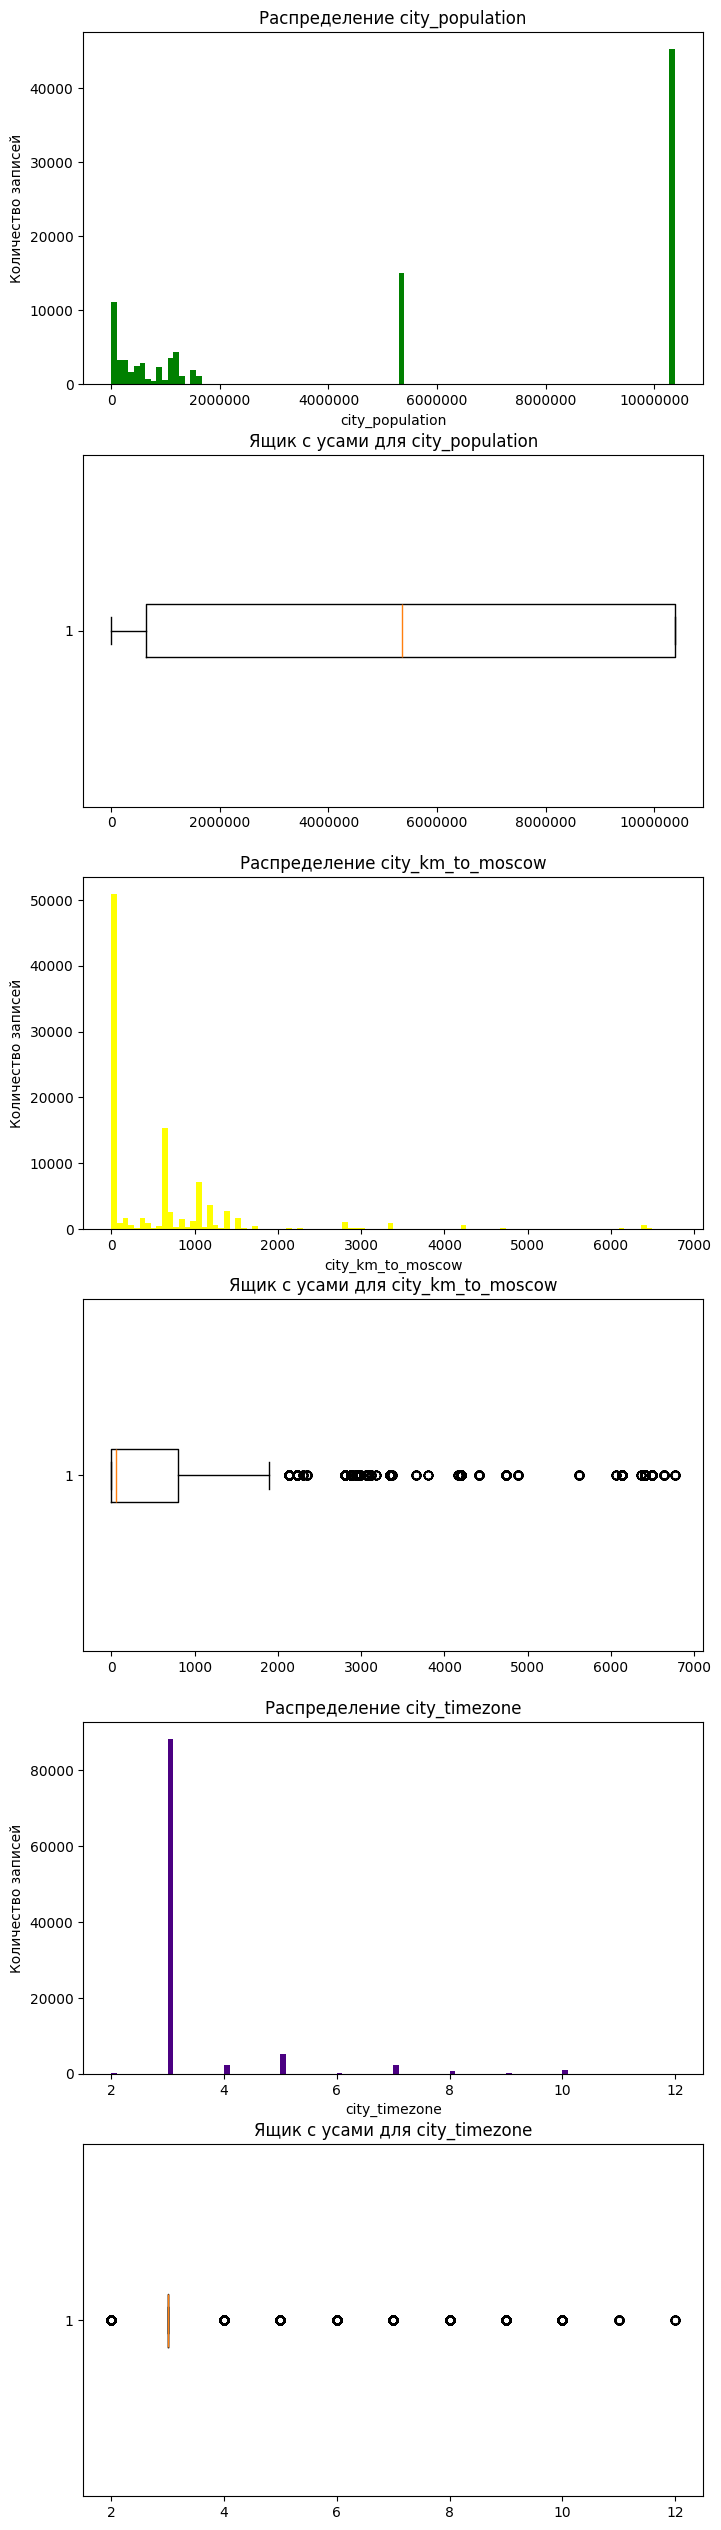

In [170]:
fig, (ax_hist, ax_box, ax_hist2, ax_box2, ax_hist3, ax_box3) = plt.subplots(ncols=1, nrows=6, figsize=(8,32))

ax_hist.hist(sessions_withnewdata_df['city_population'], bins=100, color='green')
ax_hist.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_hist.set_title('Распределение city_population')
ax_hist.set_ylabel('Количество записей')
ax_hist.set_xlabel('city_population')

ax_box.boxplot(sessions_withnewdata_df['city_population'], vert=False)
ax_box.set_title('Ящик с усами для city_population')
ax_box.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax_hist2.hist(sessions_withnewdata_df['city_km_to_moscow'], bins=100, color='yellow')
ax_hist2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_hist2.set_title('Распределение city_km_to_moscow')
ax_hist2.set_ylabel('Количество записей')
ax_hist2.set_xlabel('city_km_to_moscow')

ax_box2.boxplot(sessions_withnewdata_df['city_km_to_moscow'], vert=False)
ax_box2.set_title('Ящик с усами для city_km_to_moscow')
ax_box2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax_hist3.hist(sessions_withnewdata_df['city_timezone'], bins=100, color='indigo')
ax_hist3.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_hist3.set_title('Распределение city_timezone')
ax_hist3.set_ylabel('Количество записей')
ax_hist3.set_xlabel('city_timezone')

ax_box3.boxplot(sessions_withnewdata_df['city_timezone'], vert=False)
ax_box3.set_title('Ящик с усами для city_timezone')
ax_box3.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Необходимо избавиться от выбросов в city_timezone и city_km_to_moscow

In [171]:
def get_boundaries(datacol):
    # datacol - колонка с числами из датафрейма (в виде датафрейма)
    # datacol.mean() - среднее арифмитическое
    # datacol.std() - среднеквадратическое отклонение
	minimum = datacol.mean() - 3 * datacol.std()  
	maximum = datacol.mean() + 3 * datacol.std()
	boundaries = (minimum, maximum)
	return boundaries

    
boundaries_tz = get_boundaries(sessions_withnewdata_df['city_timezone'])
#Подсчитаем количество значений, которые больше верхней границы или меньше нижней границы
is_outlier_tz = (sessions_withnewdata_df['city_timezone'] < boundaries_tz[0]) | (sessions_withnewdata_df['city_timezone'] > boundaries_tz[1])
print("% записей с аномальным значением city_timezone: ", is_outlier_tz.sum() / sessions_withnewdata_df.shape[0]) # процент выбросов относительно общего количества записей в датасете

boundaries_kmmsk = get_boundaries(sessions_withnewdata_df['city_km_to_moscow'])
#Подсчитаем количество значений, которые больше верхней границы или меньше нижней границы
is_outlier_kmmsk = (sessions_withnewdata_df['city_km_to_moscow'] < boundaries_kmmsk[0]) | (sessions_withnewdata_df['city_km_to_moscow'] > boundaries_kmmsk[1])
print("% записей с аномальным значением city_km_to_moscow: ", is_outlier_kmmsk.sum() / sessions_withnewdata_df.shape[0]) # процент выбросов относительно общего количества записей в датасете



% записей с аномальным значением city_timezone:  0.044557493220372536
% записей с аномальным значением city_km_to_moscow:  0.020398265998931096


In [172]:
# удаляем выбросы
sessions_withnewdata_df.loc[(sessions_withnewdata_df.city_timezone < boundaries_tz[0]), ['city_timezone']] = round(boundaries_tz[0])
sessions_withnewdata_df.loc[(sessions_withnewdata_df.city_timezone > boundaries_tz[1]), ['city_timezone']] = round(boundaries_tz[1])

sessions_withnewdata_df.loc[(sessions_withnewdata_df.city_km_to_moscow < boundaries_kmmsk[0]), ['city_km_to_moscow']] = round(boundaries_kmmsk[0])
sessions_withnewdata_df.loc[(sessions_withnewdata_df.city_km_to_moscow > boundaries_kmmsk[1]), ['city_km_to_moscow']] = round(boundaries_kmmsk[1])


is_outlier_tz = (sessions_withnewdata_df['city_timezone'] < boundaries_tz[0]) | (sessions_withnewdata_df['city_timezone'] > boundaries_tz[1])
print("Избавились от аномалий: % записей с аномальным значением city_timezone: ", is_outlier_tz.sum() / sessions_withnewdata_df.shape[0]) # процент выбросов относительно общего количества записей в датасете

is_outlier_kmmsk = (sessions_withnewdata_df['city_km_to_moscow'] < boundaries_kmmsk[0]) | (sessions_withnewdata_df['city_km_to_moscow'] > boundaries_kmmsk[1])
print("Избавились от аномалий: % записей с аномальным значением city_km_to_moscow: ", is_outlier_kmmsk.sum() / sessions_withnewdata_df.shape[0]) # процент выбросов относительно общего количества записей в датасете



Избавились от аномалий: % записей с аномальным значением city_timezone:  0.044557493220372536
Избавились от аномалий: % записей с аномальным значением city_km_to_moscow:  0.020398265998931096


In [173]:
sessions_withnewdata_df.to_csv("tmp/withnewdata_session_df_0.3.csv", index=False)

In [174]:
# Проверим наличие пропусков во всем датафрейме после добавления новых признаков
sessions_withnewdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   utm_source                   101038 non-null  object  
 1   utm_campaign                 101038 non-null  object  
 2   utm_adcontent                101038 non-null  object  
 3   utm_keyword                  101038 non-null  object  
 4   device_category              101038 non-null  object  
 5   device_os                    101038 non-null  object  
 6   device_brand                 101038 non-null  object  
 7   device_browser               101038 non-null  object  
 8   geo_city                     101038 non-null  object  
 9   conversion_rate              101038 non-null  int64   
 10  is_organic_visit             101038 non-null  int64   
 11  device_screen_width          101038 non-null  int64   
 12  device_screen_height         101038 non-null

#### Визиализируем новые данные о городах

Correlation between Conversion Rate and city_timezone: -0.020324414743336572


Text(0.5, 0, 'Количество записей')

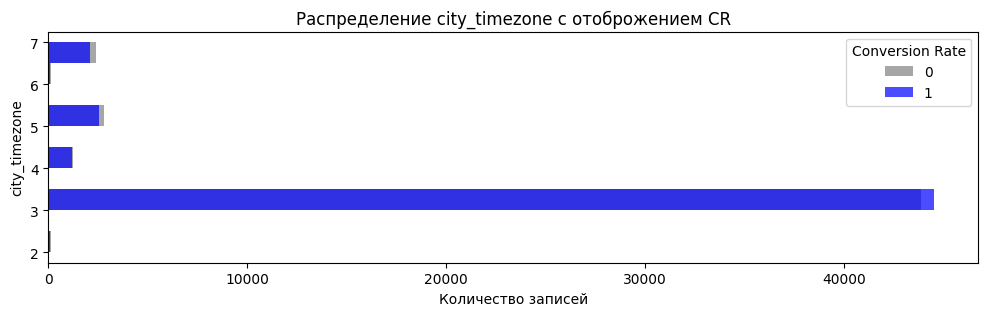

In [175]:
# city_timezone

# Вычисляем корреляцию
correlation = sessions_withnewdata_df['conversion_rate'].corr(sessions_withnewdata_df['city_timezone'])
print(f'Correlation between Conversion Rate and city_timezone: {correlation}')

colors = {0: 'grey', 1: 'blue'}
fig, ax_multihist = plt.subplots(ncols=1, nrows=1,figsize=(12,3))
ax_multihist.ticklabel_format(style='plain') 
for category in colors:
    # print(category)
    conversy_by_cat = sessions_withnewdata_df[sessions_withnewdata_df['conversion_rate'] == category]
    ax_multihist.hist(conversy_by_cat['city_timezone'], color=colors[category], alpha=0.7, orientation='horizontal')
   
ax_multihist.legend(colors, title='Conversion Rate')
ax_multihist.set_title('Распределение city_timezone с отоброжением CR')
ax_multihist.set_ylabel('city_timezone')
ax_multihist.set_xlabel('Количество записей')

Correlation between Conversion Rate and city_population: 0.033585272852856285


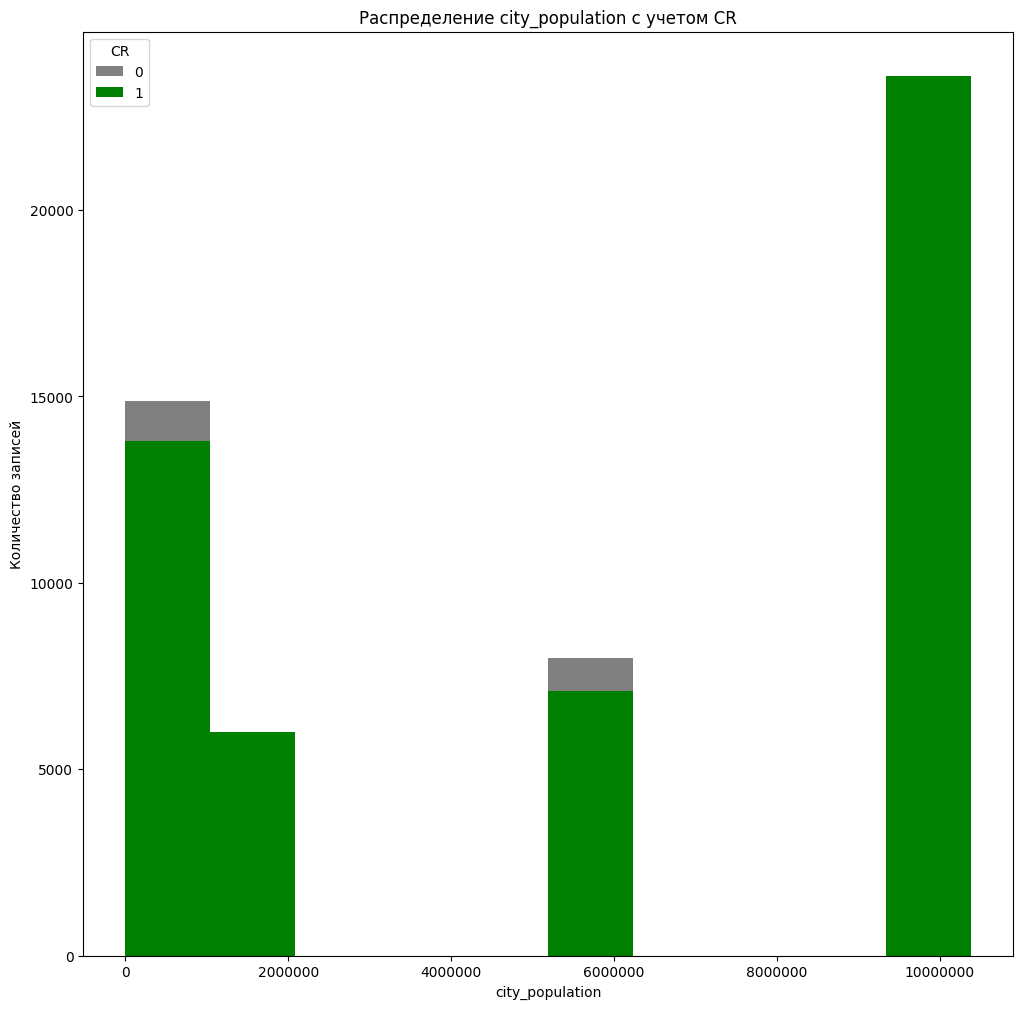

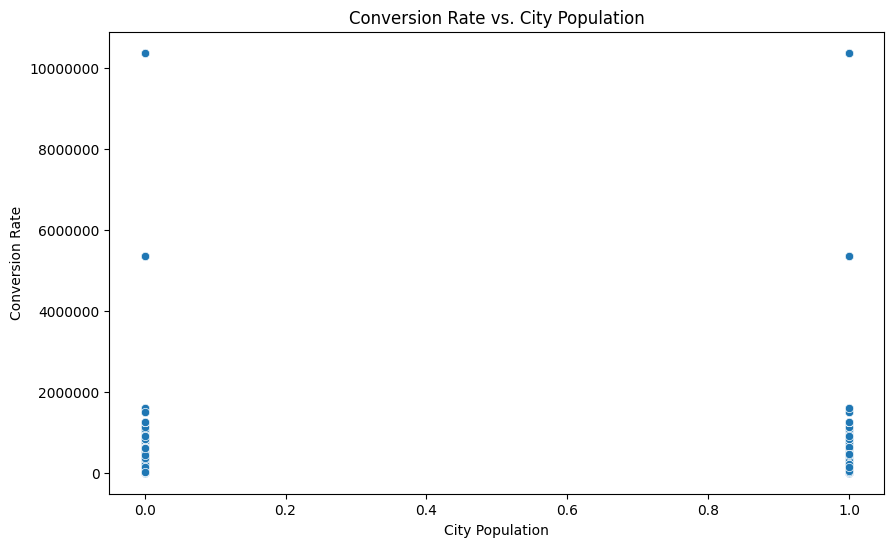

In [176]:
# city_population

# Вычисляем корреляцию
correlation = sessions_withnewdata_df['conversion_rate'].corr(sessions_withnewdata_df['city_population'])
print(f'Correlation between Conversion Rate and city_population: {correlation}')

conversion_rate = {0: 'grey', 1: 'green'}
fig, ax_hist = plt.subplots(figsize=(12,12))
ax_hist.set_title('Распределение city_population с учетом CR')

for cat in conversion_rate:
    ax_hist.hist(sessions_withnewdata_df[(sessions_withnewdata_df['conversion_rate'] == cat)]['city_population'], color=conversion_rate[cat], bins=10)

ax_hist.set_ylabel('Количество записей')
ax_hist.set_xlabel('city_population')
ax_hist.ticklabel_format(useOffset=False, style='plain')
ax_hist.legend(conversion_rate, title='CR')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=sessions_withnewdata_df, x='conversion_rate', y='city_population')
plt.xlabel('City Population')
plt.ylabel('Conversion Rate')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Conversion Rate vs. City Population')
plt.show()


Correlation between Conversion Rate and city_km_to_moscow: -0.031556648156631596


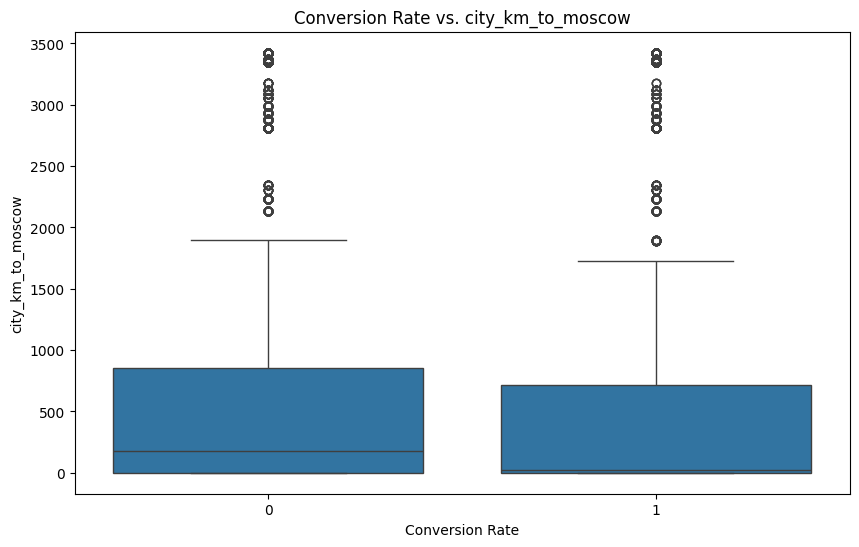

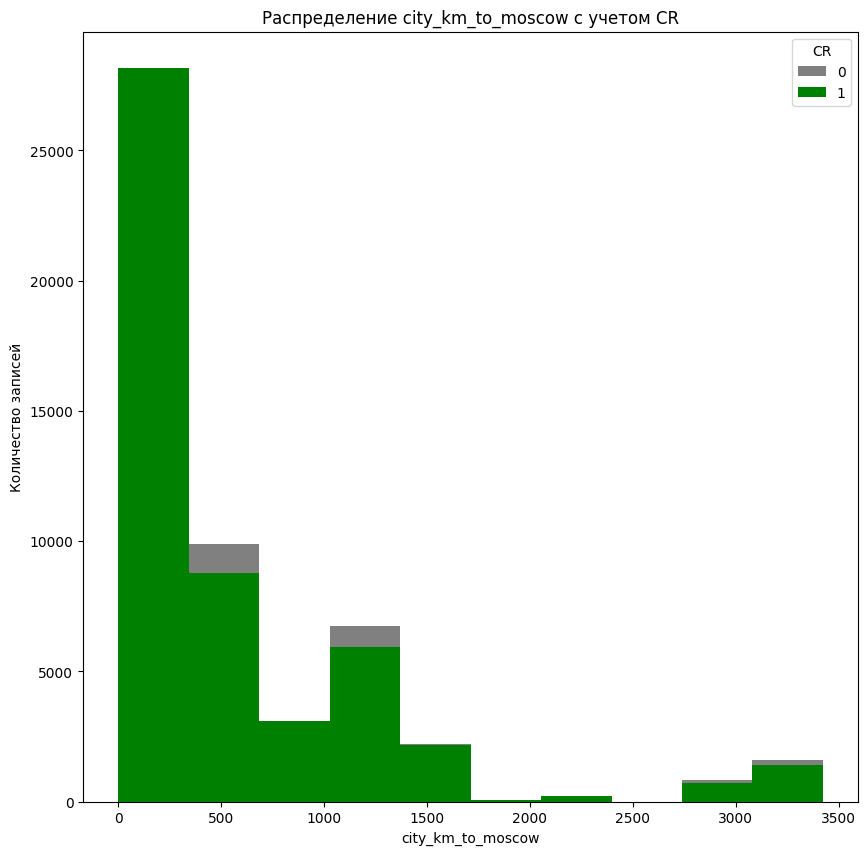

In [177]:
# city_km_to_moscow

# Вычисляем корреляцию
correlation = sessions_withnewdata_df['conversion_rate'].corr(sessions_withnewdata_df['city_km_to_moscow'])
print(f'Correlation between Conversion Rate and city_km_to_moscow: {correlation}')


plt.figure(figsize=(10, 6))
sns.boxplot(data=sessions_withnewdata_df, x='conversion_rate', y='city_km_to_moscow')
plt.xlabel('Conversion Rate')
plt.ylabel('city_km_to_moscow')
plt.title('Conversion Rate vs. city_km_to_moscow')
plt.show()



conversion_rate = {0: 'grey', 1: 'green'}
fig, ax_hist = plt.subplots(figsize=(10,10))
ax_hist.set_title('Распределение city_km_to_moscow с учетом CR')

for cat in conversion_rate:
    ax_hist.hist(sessions_withnewdata_df[(sessions_withnewdata_df['conversion_rate'] == cat)]['city_km_to_moscow'], color=conversion_rate[cat], bins=10)

ax_hist.set_ylabel('Количество записей')
ax_hist.set_xlabel('city_km_to_moscow')
ax_hist.ticklabel_format(useOffset=False, style='plain')
ax_hist.legend(conversion_rate, title='CR')

Вывод: Данные о городе почти не кореллируют с целевой переменной, думаю оставить для проверки на опыте.


#### удалим не используемые датафреймы

In [178]:
# удалим не используемые датафреймы
del sessions_withnewdata_df, full_cities_df, sessions_df_new

### Преоброзование категориальных данных (OneHotEncoder)

In [179]:
sessions_df_to_ohe = pd.read_csv("tmp/withnewdata_session_df_0.3.csv")
sessions_df_to_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   utm_source                   101038 non-null  object 
 1   utm_campaign                 101038 non-null  object 
 2   utm_adcontent                101038 non-null  object 
 3   utm_keyword                  101038 non-null  object 
 4   device_category              101038 non-null  object 
 5   device_os                    101038 non-null  object 
 6   device_brand                 101038 non-null  object 
 7   device_browser               101038 non-null  object 
 8   geo_city                     101038 non-null  object 
 9   conversion_rate              101038 non-null  int64  
 10  is_organic_visit             101038 non-null  int64  
 11  device_screen_width          101038 non-null  int64  
 12  device_screen_height         101038 non-null  int64  
 13 

In [180]:
categories_list = ['utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 'device_os', 'device_brand', 
                   'device_browser', 'geo_city']

sessions_df_to_ohe[categories_list] = sessions_df_to_ohe[categories_list].astype("category")
sessions_df_to_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   utm_source                   101038 non-null  category
 1   utm_campaign                 101038 non-null  category
 2   utm_adcontent                101038 non-null  category
 3   utm_keyword                  101038 non-null  category
 4   device_category              101038 non-null  category
 5   device_os                    101038 non-null  category
 6   device_brand                 101038 non-null  category
 7   device_browser               101038 non-null  category
 8   geo_city                     101038 non-null  category
 9   conversion_rate              101038 non-null  int64   
 10  is_organic_visit             101038 non-null  int64   
 11  device_screen_width          101038 non-null  int64   
 12  device_screen_height         101038 non-null

Создадим список категориальных признаков не учитывая целевую переменную 'conversion_rate'

Посмотрим количество уникальных значений в каждом из признаков из списка

In [181]:

for cat in categories_list:
    print(f"В категории \"{cat}\", уникальных значений: {sessions_df_to_ohe[cat].nunique()}")

В категории "utm_source", уникальных значений: 54
В категории "utm_campaign", уникальных значений: 140
В категории "utm_adcontent", уникальных значений: 61
В категории "utm_keyword", уникальных значений: 142
В категории "device_category", уникальных значений: 3
В категории "device_os", уникальных значений: 7
В категории "device_brand", уникальных значений: 37
В категории "device_browser", уникальных значений: 12
В категории "geo_city", уникальных значений: 207


Сохраним данные из этих колонок в отдельный датафрейм и преоброзуем его с помощью OneHotEncoder

In [182]:
df_catdata = sessions_df_to_ohe[categories_list]
ohe_catdata = OneHotEncoder(sparse_output=True)
ohe_catdata.fit(df_catdata)
matrix_dfcat = ohe_catdata.transform(df_catdata)
print("OneHoteEncode completed")

OneHoteEncode completed


In [183]:
# результат кодирование обернем в датафрейм
new_columns = ohe_catdata.get_feature_names_out()
df_ohedata = pd.DataFrame.sparse.from_spmatrix(data=matrix_dfcat, columns=new_columns).astype('int8')
df_ohedata

,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,utm_source_HFaOtpcChAlcMuxEAlpu,utm_source_ISrKoXQCxqqYvAZICvjs,utm_source_IZEXUFLARCUMynmHNBGo,utm_source_KgicpPxiEQfzPlPwQZJq,...,geo_city_Yegoryevsk,geo_city_Yekaterinburg,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zagorjanskas,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_empty,geo_city_other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


при условии essions_df_to_ohe['geo_city']=='Тарасовка' Index-ы в двух датафреймах совпадают значит мы можем обьеденить их по index-у:

In [184]:
# проверим соответствие index
print(sessions_df_to_ohe.shape)
sessions_df_to_ohe[sessions_df_to_ohe['geo_city']=='Vladimir'].head(5)

(101038, 20)


,utm_source,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,geo_city,conversion_rate,is_organic_visit,device_screen_width,device_screen_height,is_socialmedia_advert,device_display_megapixel,device_orientation_vertical,from_russia,city_population,city_timezone,city_km_to_moscow
31,MvfHsxITijuriZxsqZqt,gVwpGdJDpteNmFIatPTG,JNHcPlZPxEMWDnRiyoBf,empty,desktop,empty,empty,YaBrowser,Vladimir,1,0,1366,768,1,1.05,0,1,357024,3.0,178.35
32,MvfHsxITijuriZxsqZqt,gVwpGdJDpteNmFIatPTG,JNHcPlZPxEMWDnRiyoBf,empty,desktop,empty,empty,YaBrowser,Vladimir,1,0,1366,768,1,1.05,0,1,5444,7.0,3424.00
319,bByPQxmDaMXgpHeypKSM,HEimDfYZIzuQXDZAAcEW,XSkXBCPfnJjvxbfeewtd,empty,desktop,Macintosh,Apple,Safari,Vladimir,1,1,1792,1120,0,2.01,0,1,357024,3.0,178.35
320,bByPQxmDaMXgpHeypKSM,HEimDfYZIzuQXDZAAcEW,XSkXBCPfnJjvxbfeewtd,empty,desktop,Macintosh,Apple,Safari,Vladimir,1,1,1792,1120,0,2.01,0,1,5444,7.0,3424.00
358,fDLlAcSmythWSCVMvqvL,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,empty,mobile,iOS,Apple,Safari,Vladimir,1,1,320,568,0,0.18,1,1,357024,3.0,178.35


In [185]:
# проверим соответствие index
print(df_ohedata.shape)
df_ohedata[df_ohedata['geo_city_Vladimir']==1].head(5)

(101038, 663)


,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,utm_source_HFaOtpcChAlcMuxEAlpu,utm_source_ISrKoXQCxqqYvAZICvjs,utm_source_IZEXUFLARCUMynmHNBGo,utm_source_KgicpPxiEQfzPlPwQZJq,...,geo_city_Yegoryevsk,geo_city_Yekaterinburg,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zagorjanskas,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_empty,geo_city_other
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Удалим колонки преоброзованные с помощью OneHoteEncode из исходного Датафрейма
sessions_df_to_ohe.drop(columns=categories_list, inplace=True)
print("Удалили колонки:", categories_list, sep="\n")

Удалили колонки:
['utm_source', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 'device_os', 'device_brand', 'device_browser', 'geo_city']


In [187]:
# Обьеденим 2 датафрейма
print(df_ohedata.shape, sessions_df_to_ohe.shape)
# sessions_ohe_df = pd.concat([sessions_df_to_ohe, df_ohedata], axis=1)
sessions_ohe_df = sessions_df_to_ohe.merge(df_ohedata, left_index=True, right_index=True, sort=False, copy=False)
print(sessions_ohe_df.shape)
sessions_ohe_df.info()

(101038, 663) (101038, 11)
(101038, 674)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Columns: 674 entries, conversion_rate to geo_city_other
dtypes: float64(3), int64(8), int8(663)
memory usage: 72.4 MB


In [188]:
# Проверим для себя верно ли обьеденили данные с тем же условием что выше
print(sessions_ohe_df.shape)
sessions_ohe_df[sessions_ohe_df['geo_city_Vladimir']==1].head(5)

(101038, 674)


,conversion_rate,is_organic_visit,device_screen_width,device_screen_height,is_socialmedia_advert,device_display_megapixel,device_orientation_vertical,from_russia,city_population,city_timezone,...,geo_city_Yegoryevsk,geo_city_Yekaterinburg,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zagorjanskas,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_empty,geo_city_other
31,1,0,1366,768,1,1.05,0,1,357024,3.0,...,0,0,0,0,0,0,0,0,0,0
32,1,0,1366,768,1,1.05,0,1,5444,7.0,...,0,0,0,0,0,0,0,0,0,0
319,1,1,1792,1120,0,2.01,0,1,357024,3.0,...,0,0,0,0,0,0,0,0,0,0
320,1,1,1792,1120,0,2.01,0,1,5444,7.0,...,0,0,0,0,0,0,0,0,0,0
358,1,1,320,568,0,0.18,1,1,357024,3.0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
# Сохраним полученные данные в CSV
sessions_ohe_df.to_pickle("tmp/ohe_sessions_df_0.4.pkl")
print("файл с Ohe преоброзованием сохранен (.pkl)")

файл с Ohe преоброзованием сохранен (.pkl)


In [190]:
# Удалим исходные датафреймы
del sessions_ohe_df, df_ohedata, sessions_df_to_ohe

### Стандартизация данных с помощью StandardScaler

In [191]:
session_df_to_scaler = pd.read_pickle("tmp/ohe_sessions_df_0.4.pkl")
session_df_to_scaler

,conversion_rate,is_organic_visit,device_screen_width,device_screen_height,is_socialmedia_advert,device_display_megapixel,device_orientation_vertical,from_russia,city_population,city_timezone,...,geo_city_Yegoryevsk,geo_city_Yekaterinburg,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zagorjanskas,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_empty,geo_city_other
0,1,0,320,694,0,0.22,1,1,10381222,3.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,414,896,1,0.37,1,1,56798,3.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,375,812,0,0.30,1,1,297137,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2048,1152,0,2.36,0,1,10381222,3.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1536,864,0,1.33,0,1,12284,3.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101033,0,0,414,896,1,0.37,1,1,10381222,3.0,...,0,0,0,0,0,0,0,0,0,0
101034,0,1,375,667,0,0.25,1,1,137041,3.0,...,0,0,0,0,0,0,0,0,0,0
101035,0,0,375,667,0,0.25,1,1,1259013,3.0,...,0,0,0,0,0,0,0,0,0,0
101036,0,1,1366,768,0,1.05,0,1,12284,3.0,...,0,0,0,0,0,0,0,0,1,0


In [192]:
session_df_to_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Columns: 674 entries, conversion_rate to geo_city_other
dtypes: float64(3), int64(8), int8(663)
memory usage: 72.4 MB


In [193]:

session_df_to_scaler.select_dtypes(include=['float64', 'int64'])

,conversion_rate,is_organic_visit,device_screen_width,device_screen_height,is_socialmedia_advert,device_display_megapixel,device_orientation_vertical,from_russia,city_population,city_timezone,city_km_to_moscow
0,1,0,320,694,0,0.22,1,1,10381222,3.0,0.00
1,0,0,414,896,1,0.37,1,1,56798,3.0,23.01
2,0,0,375,812,0,0.30,1,1,297137,3.0,1498.60
3,0,0,2048,1152,0,2.36,0,1,10381222,3.0,0.00
4,0,0,1536,864,0,1.33,0,1,12284,3.0,1079.11
...,...,...,...,...,...,...,...,...,...,...,...
101033,0,0,414,896,1,0.37,1,1,10381222,3.0,0.00
101034,0,1,375,667,0,0.25,1,1,137041,3.0,23.10
101035,0,0,375,667,0,0.25,1,1,1259013,3.0,401.69
101036,0,1,1366,768,0,1.05,0,1,12284,3.0,1079.11


In [194]:
# Создадим список количественных колонок
numerical_columnslist = ['device_screen_width', 'device_screen_height', 'device_display_megapixel', 'city_population', 'city_timezone', 'city_km_to_moscow']
print(numerical_columnslist)
# Создадим новый датафрейм со всеми числовыми переменными из списка numerical_columnslist
data_to_scaler = session_df_to_scaler[numerical_columnslist]
data_to_scaler

['device_screen_width', 'device_screen_height', 'device_display_megapixel', 'city_population', 'city_timezone', 'city_km_to_moscow']


,device_screen_width,device_screen_height,device_display_megapixel,city_population,city_timezone,city_km_to_moscow
0,320,694,0.22,10381222,3.0,0.00
1,414,896,0.37,56798,3.0,23.01
2,375,812,0.30,297137,3.0,1498.60
3,2048,1152,2.36,10381222,3.0,0.00
4,1536,864,1.33,12284,3.0,1079.11
...,...,...,...,...,...,...
101033,414,896,0.37,10381222,3.0,0.00
101034,375,667,0.25,137041,3.0,23.10
101035,375,667,0.25,1259013,3.0,401.69
101036,1366,768,1.05,12284,3.0,1079.11


С помощью StandardScaler стандартизируем числовые данные и создадим из этих данных новый датафрейм df_data_std

In [195]:
std_scaler = StandardScaler() 
std_scaler.fit(data_to_scaler)
data_std = std_scaler.transform(data_to_scaler)
new_columns_name = [name+"_std" for name in numerical_columnslist]
df_data_std = pd.DataFrame(columns=new_columns_name, data=data_std)
df_data_std

,device_screen_width_std,device_screen_height_std,device_display_megapixel_std,city_population_std,city_timezone_std,city_km_to_moscow_std
0,-0.635139,-1.023013,-0.622579,1.037231,-0.333925,-0.695566
1,-0.461737,0.383025,-0.379901,-1.243703,-0.333925,-0.665254
2,-0.533680,-0.201664,-0.493151,-1.190606,-0.333925,1.278584
3,2.552516,2.164936,2.839628,1.037231,-0.333925,-0.695566
4,1.608026,0.160287,1.173239,-1.253537,-0.333925,0.725977
...,...,...,...,...,...,...
101033,-0.461737,0.383025,-0.379901,1.037231,-0.333925,-0.695566
101034,-0.533680,-1.210949,-0.574044,-1.225975,-0.333925,-0.665136
101035,-0.533680,-1.210949,-0.574044,-0.978102,-0.333925,-0.166408
101036,1.294426,-0.507930,0.720240,-1.253537,-0.333925,0.725977


In [196]:
session_df_to_scaler[numerical_columnslist]

,device_screen_width,device_screen_height,device_display_megapixel,city_population,city_timezone,city_km_to_moscow
0,320,694,0.22,10381222,3.0,0.00
1,414,896,0.37,56798,3.0,23.01
2,375,812,0.30,297137,3.0,1498.60
3,2048,1152,2.36,10381222,3.0,0.00
4,1536,864,1.33,12284,3.0,1079.11
...,...,...,...,...,...,...
101033,414,896,0.37,10381222,3.0,0.00
101034,375,667,0.25,137041,3.0,23.10
101035,375,667,0.25,1259013,3.0,401.69
101036,1366,768,1.05,12284,3.0,1079.11


In [197]:
# Удалим преобразованные колонки
session_df_to_scaler.drop(columns=numerical_columnslist, inplace=True)
print("После StandartSceler, преоброзованные колонки удалены", session_df_to_scaler.shape)

После StandartSceler, преоброзованные колонки удалены (101038, 668)


In [198]:
print(df_data_std.shape, session_df_to_scaler.shape)
session_scaler_df = session_df_to_scaler.merge(df_data_std, left_index=True, right_index=True, sort=False, copy=False)
print(session_scaler_df.shape)

(101038, 6) (101038, 668)
(101038, 674)


In [199]:
session_scaler_df

,conversion_rate,is_organic_visit,is_socialmedia_advert,device_orientation_vertical,from_russia,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,...,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_empty,geo_city_other,device_screen_width_std,device_screen_height_std,device_display_megapixel_std,city_population_std,city_timezone_std,city_km_to_moscow_std
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.635139,-1.023013,-0.622579,1.037231,-0.333925,-0.695566
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,-0.461737,0.383025,-0.379901,-1.243703,-0.333925,-0.665254
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.533680,-0.201664,-0.493151,-1.190606,-0.333925,1.278584
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2.552516,2.164936,2.839628,1.037231,-0.333925,-0.695566
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1.608026,0.160287,1.173239,-1.253537,-0.333925,0.725977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101033,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,-0.461737,0.383025,-0.379901,1.037231,-0.333925,-0.695566
101034,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.533680,-1.210949,-0.574044,-1.225975,-0.333925,-0.665136
101035,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.533680,-1.210949,-0.574044,-0.978102,-0.333925,-0.166408
101036,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1.294426,-0.507930,0.720240,-1.253537,-0.333925,0.725977


In [200]:
session_scaler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Columns: 674 entries, conversion_rate to city_km_to_moscow_std
dtypes: float64(6), int64(5), int8(663)
memory usage: 72.4 MB


In [201]:
session_scaler_df.to_pickle("tmp/stdscaler_sessiona_df_0.5.pkl")
print("преоброзование StandartScaler окончено, результат сохранил в .pkl файл")

преоброзование StandartScaler окончено, результат сохранил в .pkl файл


<ul>Описание преобразованного датасета:
    <li>conversion_rate - [1, 0] Коэффициент конверсии сессии в целевое действие</li>
    <li>is_organic_visit - Показатель органического трафика (0 - Платный трафик, 1 - Органический)</li>
    <li>is_socialmedia_advert - Реклама в социалных сетях (0 - нет, 1 - да)</li>
    <li>device_orientation_vertical - Вертикальная ориентация дисплея (0 - нет, 1 - да)</li>
    <li>from_russia - сессия с територии России (0 - нет, 1 - да)</li>
    <li>utm_source_* - каналы привлечения</li>
    <li>utm_campaign_* - рекламная компания</li>
    <li>utm_adcontent_* - Данные не указаны в ТЗ, но подозреваю что это данные о рекламной компании</li>
    <li>utm_keyword_* - ключевое слово</li>
    <li>device_category_* - тип устройства</li>
    <li>device_os_* - операционная система устройства</li>
    <li>device_brand_* - марка устройства</li>
    <li>device_browser_* - браузер</li>
    <li>geo_city_* - город</li>
    <li>device_screen_width_std - ширина дисплея пользователя в пикселях</li>
    <li>device_screen_height_std - высота дисплея пользователя в пикселях</li>
    <li>device_display_megapixel_std - мегапиксели у дисплея пользователя</li>
    <li>city_population_std - население города указанного в geo_city сессии</li>
    <li>city_timezone_std - часовой пояс города указанного в geo_city сессии</li>
    <li>city_km_to_moscow_std - растояние до Москвы от города указаного в geo_city сессии</li>
</ul>

In [202]:
del session_scaler_df, df_data_std, session_df_to_scaler

# Modelling

In [226]:
sessions_tomodeling = pd.read_pickle("tmp/stdscaler_sessiona_df_0.5.pkl")
sessions_tomodeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101038 entries, 0 to 101037
Columns: 674 entries, conversion_rate to city_km_to_moscow_std
dtypes: float64(6), int64(5), int8(663)
memory usage: 72.4 MB


In [227]:
sessions_tomodeling

,conversion_rate,is_organic_visit,is_socialmedia_advert,device_orientation_vertical,from_russia,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,...,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_empty,geo_city_other,device_screen_width_std,device_screen_height_std,device_display_megapixel_std,city_population_std,city_timezone_std,city_km_to_moscow_std
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.63514,-1.02301,-0.62258,1.03723,-0.33392,-0.69557
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,-0.46174,0.38303,-0.37990,-1.24370,-0.33392,-0.66525
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.53368,-0.20166,-0.49315,-1.19061,-0.33392,1.27858
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2.55252,2.16494,2.83963,1.03723,-0.33392,-0.69557
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1.60803,0.16029,1.17324,-1.25354,-0.33392,0.72598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101033,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,-0.46174,0.38303,-0.37990,1.03723,-0.33392,-0.69557
101034,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.53368,-1.21095,-0.57404,-1.22597,-0.33392,-0.66514
101035,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-0.53368,-1.21095,-0.57404,-0.97810,-0.33392,-0.16641
101036,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1.29443,-0.50793,0.72024,-1.25354,-0.33392,0.72598


## Подбор лучшей и тюнинг модели

Разделим целевую переменную от фитч

In [228]:
targets_df = sessions_tomodeling['conversion_rate']
fitches_df = sessions_tomodeling.drop(columns=['conversion_rate'])
print(f"targets_df: {targets_df.shape}\nfitches_df: {fitches_df.shape}")

targets_df: (101038,)
fitches_df: (101038, 673)


In [229]:
fitches_train, fitches_test, target_train, target_test = train_test_split(fitches_df, targets_df, 
                                                                          test_size=0.3, random_state=42, stratify=targets_df)
print("размер датафрейма фитч для трейна: ", fitches_train.shape)
print("размер датафрейма с целевой переменной для трейна: ", target_train.shape)

размер датафрейма фитч для трейна:  (70726, 673)
размер датафрейма с целевой переменной для трейна:  (70726,)


In [230]:
# сделаем функцию отображающую roc кривую на графике
def drow_roc_auc(target_test, y_pred_proba):
    # Построение ROC-кривой
    fpr, tpr, thresholds = roc_curve(target_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    return None



Посмотрим распределение классов между вариациями целевой переменной

In [231]:
classes_ttrain = target_train.unique()
# определяем балансированность классов в выборке
class_weights = compute_class_weight('balanced', classes=classes_ttrain, y=target_train)
print("Class Weights:", class_weights)

# Преобразуем результат в словарь для удобства
class_weights_dict = {classes_ttrain[i]: class_weights[i] for i in range(len(classes_ttrain))}
print("Class Weights Dict:", class_weights_dict)

Class Weights: [1.0001697  0.99983036]
Class Weights Dict: {1: 1.000169697655344, 0: 0.9998303599197037}


Случайный лес (тест и тюнинг)

### <b>Случайный лес</b>


In [232]:

# Случайный лес 
rndf_tunned = RandomForestClassifier(
    random_state=42,
    bootstrap=True,
    n_estimators=200,
    # max_depth=None,
    max_features='log2',
    # min_samples_leaf=1,
    min_samples_split=4,
    class_weight=class_weights_dict,
    n_jobs=-1    
)

# ДЛЯ ОТЛАДКИ, проверка на обьем данных чтобы не напрягать свой ноут
if (fitches_train.shape[0]<=400000):
    rndf_tunned.fit(fitches_train, target_train)
    
    # Предсказание вероятностей на тестовых данных
    y_pred_proba = rndf_tunned.predict_proba(fitches_test)[:, 1]
    
    # Расчет ROC-AUC
    roc_auc = roc_auc_score(target_test, y_pred_proba)
    print(f'ROC-AUC Score: {roc_auc:.4f}')
else:
    print("будет долго")


ROC-AUC Score: 0.6573


### <b>MLPClassifier, многослойный пресептрон</b>

/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Обучение окончено, приступим к предсказаниями на тестовых данных
ROC-AUC Score: 0.6691


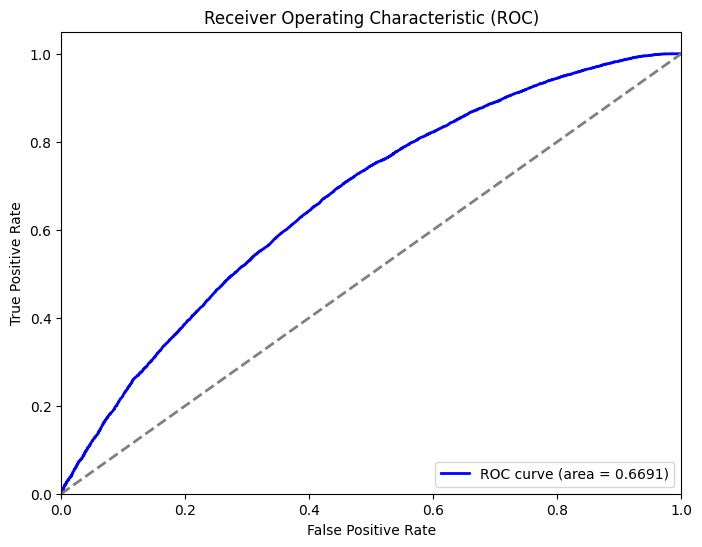

In [248]:
# Создание и настройка MLPClassifier
mlp_tuned = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),  # Количество нейронов в скрытых слоях
    activation='relu',  # Функция активации
    solver= 'adam',  # Алгоритм оптимизации
    batch_size=256,  # Размер батча
    learning_rate='adaptive',  # Адаптивная скорость обучения
    max_iter=1,  # Максимальное количество итераций на один вызов partial_fit
    warm_start=True,  # Чтобы модель не переобучалась при каждом вызове partial_fit
    random_state=42
)

mlp_tuned.fit(fitches_train, target_train)
# обучение частями
# # Определение классов
# classes = np.unique(target_train)

# # Инициализация частичного обучения
# mlp_tuned.partial_fit(fitches_train[:256], target_train[:256], classes=classes)

# # Обучение модели на батчах данных
# batch_size = 200000  # Размер батча
# n_batches = len(fitches_train) // batch_size + 1

# for i in range(n_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, len(fitches_train))
#     mlp_tuned.partial_fit(fitches_train[start:end], target_train[start:end])


print("Обучение окончено, приступим к предсказаниями на тестовых данных")
# Предсказания вероятностей для тестового набора
y_pred_proba = mlp_tuned.predict_proba(fitches_test)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

drow_roc_auc(target_test, y_pred_proba) #0.6826 при стандартскалер 0.6738 до переделки alternativeName | 6695 до изменений данных о городе

In [234]:
# Получение списка коэффициентов (матриц весов) для каждого слоя
coefs_list = mlp_tuned.coefs_

# Оценка важности фичей на основе коэффициентов
for i, coefs in enumerate(coefs_list):
    layer_num = i + 1
    if i == 0:
        print(f"Веса для входного слоя: {coefs.shape}")
    elif i == len(coefs_list) - 1:
        print(f"Веса для выходного слоя: {coefs.shape}")
    else:
        print(f"Веса для скрытого слоя {layer_num}: {coefs.shape}")




Веса для входного слоя: (673, 150)
Веса для скрытого слоя 2: (150, 100)
Веса для скрытого слоя 3: (100, 50)
Веса для выходного слоя: (50, 1)


In [235]:
# Для оценки важности фичей можно также использовать значения коэффициентов
# Например, можно посчитать среднее абсолютное значение коэффициентов для каждой фичи
mean_abs_coefs = np.mean(np.abs(mlp_tuned.coefs_[0]), axis=1)
# mean_abs_coefs = np.mean(mlp_tuned.coefs_[0], axis=1)
feature_importance = pd.DataFrame({'Feature': fitches_train.columns, 'Importance': mean_abs_coefs})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
feature_importance

,Feature,Importance
38,utm_source_fgymSoTvjKPEgaIJqsiH,0.067
229,utm_adcontent_XKsYZiUFcdkUXQpoLKyS,0.066
226,utm_adcontent_UxrnyMlRBSOhOjytXnMG,0.065
225,utm_adcontent_TuyPWsGQruPMpKvRxeBF,0.065
39,utm_source_gDBGzjFKYabGgSPZvrDH,0.064
...,...,...
331,utm_keyword_YXWqiDDFMTXMPIEHmCmi,0.019
548,geo_city_Meleuz,0.019
468,geo_city_Armavir,0.019
586,geo_city_Povarovo,0.018


### <b>SGDClassifier</b> Стохастический градиентный спуск с логистической регрессией (log_loss) (Stochastic Gradient Descent, SGD)

ROC-AUC Score: 0.6747


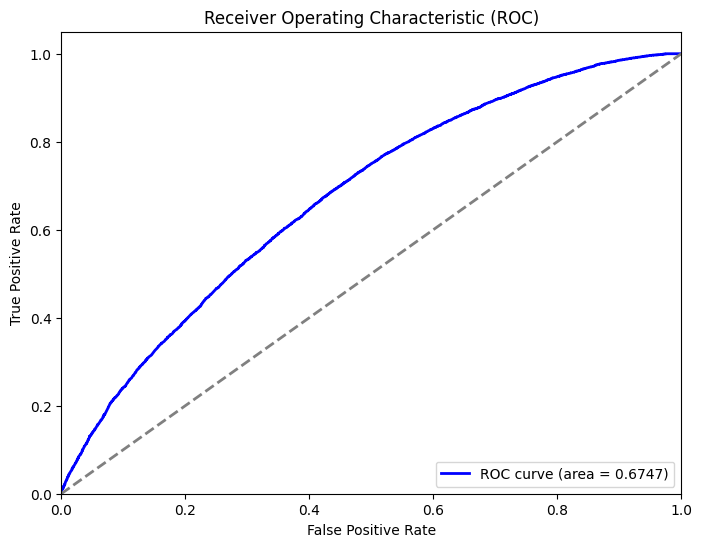

In [246]:
#  SGDClassifier


class_weights_dict = {0: 1, 1: 2}#{0: 0.01, 1: 0.34} #0.67
# Создание и настройка SGDClassifier для логистической регрессии
sgd_log_reg = SGDClassifier(
    loss='log_loss',  # Логистическая регрессия
    alpha=0.0001,  # Регуляризационный параметр
    penalty='l2',  # L2 регуляризация
    max_iter=1000,  # Максимальное количество итераций не работает при partial_fit
    random_state=42,
    learning_rate='optimal',
    # class_weight=class_weights_dict,
    eta0=0.01,  # Начальный шаг обучения
    warm_start=True, # при вызове fit используется данные предидущего обучения
    n_jobs=-1  # Использование всех доступных процессоров
)
sgd_log_reg.fit(fitches_train, target_train)
# Обучение модели на батчах данных
# batch_size = 50000  # Размер батча
# n_batches = len(fitches_train) // batch_size + 1

# for i in range(n_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, len(fitches_train))
#      # Вычисление весов для каждого образца
#     # batch_weight = compute_sample_weight(class_weight=class_weights_dict, y=target_train[start:end])
#     sgd_log_reg.partial_fit(fitches_train[start:end], target_train[start:end], classes=[0, 1])#, sample_weight=batch_weight)

# Предсказания вероятностей для тестового набора
y_pred_proba = sgd_log_reg.predict_proba(fitches_test)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

drow_roc_auc(target_test, y_pred_proba) 
#0.6714 пи стандартскалер 0.6597 до изменения данных о городе alternativeName в name
# 0.6333 до изменения стратегии заполнения пустот данных о городе 

In [250]:
# Получение коэффициентов (весов) и свободного члена модели
coefficients = sgd_log_reg.coef_.flatten()  # Получаем одномерный массив коэффициентов
intercept = sgd_log_reg.intercept_[0]  # Получаем значение свободного члена (байеса)

# Получаем названия фичей
feature_names = fitches_train.columns

# Создаем DataFrame для хранения фичей и их вклада
feature_contributions = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Добавляем свободный член (bias) в DataFrame
feature_contributions.loc[len(feature_contributions)] = ['Intercept', intercept]

# Выводим результаты, отсортированные по вкладу в положительный класс целевой переменной (коэффициенту)
feature_contributions_sorted = feature_contributions.sort_values(by='Coefficient', ascending=False)
print(feature_contributions_sorted)

# Фильтрация фичей с нулевыми или близкими к нулю коэффициентами - их влияние на предсказание нулевое или близко к нулю
insignificant_features = feature_contributions[feature_contributions['Coefficient'].abs() < 0.001]

print("Фичи с нулевым или близкими к нулю весами:")
print(insignificant_features)
feature_contributions_sorted[feature_contributions_sorted['Feature'].str.contains('Safari')]#[insignificant_features['Feature']=='city_km_to_moscow_std']

                                Feature  Coefficient
51      utm_source_nrKihqcWGIzDsOqljdAv      1.12783
161   utm_campaign_kwdmElMUPDZaLQdgjcsI      1.10162
221  utm_adcontent_PkybGvWbaqORmxjNunqZ      1.08964
66    utm_campaign_DsqwamlMwRgMTyspCjFR      1.05336
0                      is_organic_visit      1.05271
..                                  ...          ...
19      utm_source_RmEBuqrriAfAVsLQQmhk     -1.00993
187   utm_campaign_vRLTQQKAsFQMxbcHGPhu     -1.03107
229  utm_adcontent_XKsYZiUFcdkUXQpoLKyS     -1.28294
225  utm_adcontent_TuyPWsGQruPMpKvRxeBF     -1.34525
673                           Intercept     -2.50003

[674 rows x 2 columns]
Фичи с нулевым или близкими к нулю весами:
                              Feature  Coefficient
14    utm_source_MvfHsxITijuriZxsqZqt      0.00013
370  utm_keyword_pQhDyEDSvgnXNvMXPAhy     -0.00016


,Feature,Coefficient
454,device_browser_Safari,0.13048
455,device_browser_Safari (in-app),-0.44715


ROC-AUC Score: 0.5477


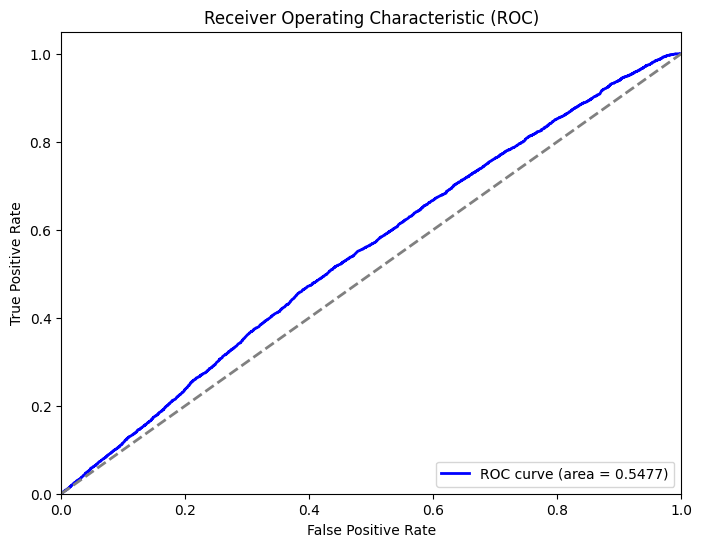

In [252]:
# Линейная классификатор Perceptron
# Инициализация Perceptron
perceptron_clf = Perceptron(
    penalty='l2',
    alpha=0.0001, 
    max_iter=1000, 
    random_state=42,
    n_jobs=-1
)

perceptron_clf.fit(fitches_train, target_train)
# Обучение по частям данных
# batch_size = 50000
# for i in range(0, len(fitches_train), batch_size):
#     batch_features = fitches_train[i:i + batch_size]
#     batch_target = target_train[i:i + batch_size]
#     perceptron_clf.partial_fit(batch_features, batch_target, classes=np.unique(target_train))

# Предсказание вероятностей на тестовом наборе данных
y_pred_proba = perceptron_clf.decision_function(fitches_test)

# Вычисление ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')
drow_roc_auc(target_test, y_pred_proba)

# Results

### Лучшие модели:

#### <b>Оптимальные настройки MLPClassifier</b>

У данной модели лучший показатель ROC_AUC, но она уступает по скорости SGDClassifier.<br>
Так же есть проблема интерпритации влияния фитчей на положительный резльтат целевой переменной.

размер датафрейма фитч для трейна:  (70726, 673)
размер датафрейма с целевой переменной для трейна:  (70726,)


/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC-AUC Score: 0.6804


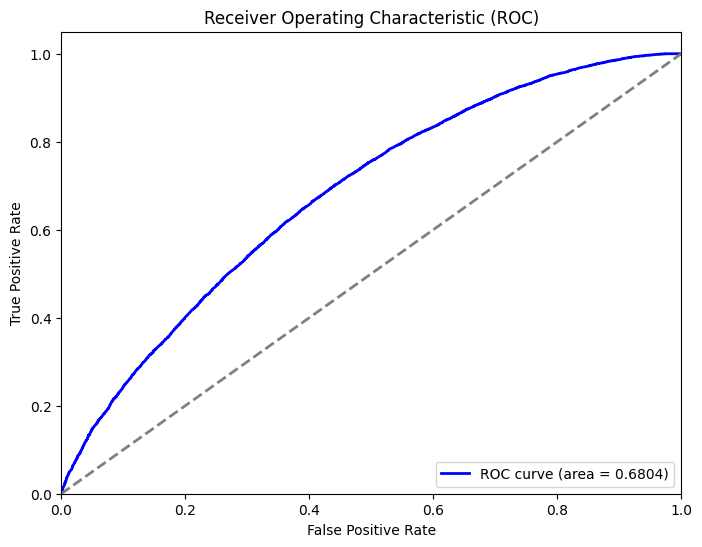

In [256]:
targets_df = sessions_tomodeling['conversion_rate']
fitches_df = sessions_tomodeling.drop(columns=['conversion_rate'])

fitches_train, fitches_test, target_train, target_test = train_test_split(fitches_df, targets_df, 
                                                                          test_size=0.3, random_state=42, stratify=targets_df)
print("размер датафрейма фитч для трейна: ", fitches_train.shape)
print("размер датафрейма с целевой переменной для трейна: ", target_train.shape)

# Создание и настройка MLPClassifier
mlp_tuned = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),  # Количество нейронов в скрытых слоях
    activation='relu',  # Функция активации
    solver='adam',  # Алгоритм оптимизации
    learning_rate='adaptive',  # Адаптивная скорость обучения
    max_iter=1,  # Максимальное количество итераций на один вызов partial_fit    
    random_state=42
)
mlp_tuned.fit(fitches_train, target_train)
# # Определение классов
# classes = np.unique(target_train)

# # Инициализация частичного обучения
# mlp_tuned.partial_fit(fitches_train[:256], target_train[:256], classes=classes)

# Обучение модели на батчах данных
# batch_size = 50000  # Размер батча
# n_batches = len(fitches_train) // batch_size + 1

# for i in range(n_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, len(fitches_train))
#     mlp_tuned.partial_fit(fitches_train[start:end], target_train[start:end])

# Предсказания вероятностей для тестового набора
y_pred_proba = mlp_tuned.predict_proba(fitches_test)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

drow_roc_auc(target_test, y_pred_proba)

In [257]:
# Для оценки важности фичей можно использовать значения коэффициентов
# Например, можно посчитать среднее абсолютное значение коэффициентов для каждой фичи
mlp_mean_abs_coefs = np.mean(np.abs(mlp_tuned.coefs_[0]), axis=1)
# mean_abs_coefs = np.mean(mlp_tuned.coefs_[0], axis=1)
mlp_feature_importance = pd.DataFrame({'Feature': fitches_train.columns, 'Importance': mlp_mean_abs_coefs})
mlp_feature_importance = mlp_feature_importance.sort_values(by='Importance', ascending=False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
mlp_feature_importance

,Feature,Importance
229,utm_adcontent_XKsYZiUFcdkUXQpoLKyS,0.07322
225,utm_adcontent_TuyPWsGQruPMpKvRxeBF,0.06895
38,utm_source_fgymSoTvjKPEgaIJqsiH,0.06779
19,utm_source_RmEBuqrriAfAVsLQQmhk,0.06592
39,utm_source_gDBGzjFKYabGgSPZvrDH,0.06352
...,...,...
548,geo_city_Meleuz,0.01580
410,device_os_other,0.01519
388,utm_keyword_vOXubAVUYXkYNgrXYqNP,0.01466
233,utm_adcontent_ailGqjxuJsYcAqCUFSXX,0.01418


In [258]:
# избавляемся от фитч с коэфициентом ниже 0.001
targets_df = sessions_tomodeling['conversion_rate']
fitches_df = sessions_tomodeling.drop(columns=['conversion_rate']+mlp_feature_importance['Feature'][mlp_feature_importance['Importance']<0.001].to_list())
print(f"targets_df: {targets_df.shape}\nfitches_df: {fitches_df.shape}")

targets_df: (101038,)
fitches_df: (101038, 673)


размер датафрейма фитч для трейна:  (70726, 673)
размер датафрейма с целевой переменной для трейна:  (70726,)


/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC-AUC Score: 0.6804


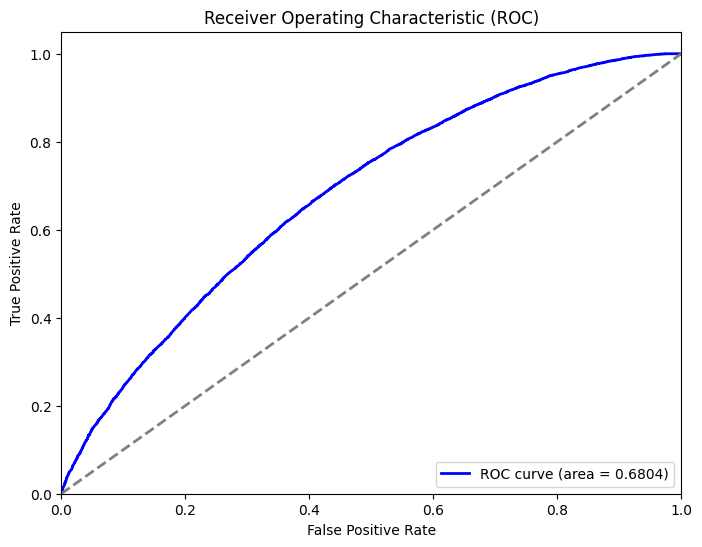

In [261]:
# Обучаем с новыми фитчами

fitches_train, fitches_test, target_train, target_test = train_test_split(fitches_df, targets_df, 
                                                                          test_size=0.3, random_state=42, stratify=targets_df)
print("размер датафрейма фитч для трейна: ", fitches_train.shape)
print("размер датафрейма с целевой переменной для трейна: ", target_train.shape)

# Создание и настройка MLPClassifier
mlp_tuned = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),  # Количество нейронов в скрытых слоях
    activation='relu',  # Функция активации
    solver='adam',  # Алгоритм оптимизации
    learning_rate='adaptive',  # Адаптивная скорость обучения
    max_iter=1,  # Максимальное количество итераций на один вызов partial_fit    
    random_state=42
)

mlp_tuned.fit(fitches_train, target_train)
# # Определение классов
# classes = np.unique(target_train)

# # Инициализация частичного обучения
# mlp_tuned.partial_fit(fitches_train[:256], target_train[:256], classes=classes)

# # Обучение модели на батчах данных
# batch_size = 50000  # Размер батча
# n_batches = len(fitches_train) // batch_size + 1

# for i in range(n_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, len(fitches_train))
#     mlp_tuned.partial_fit(fitches_train[start:end], target_train[start:end])

# Предсказания вероятностей для тестового набора
y_pred_proba = mlp_tuned.predict_proba(fitches_test)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

drow_roc_auc(target_test, y_pred_proba)

#### <b>Оптимальные настройки модели SGDClassifier</b>, эта модель показала большую скорость обучения и набрала один из высоких результатов:

targets_df: (101038,)
fitches_df: (101038, 673)
размер датафрейма фитч для трейна:  (70726, 673)
размер датафрейма с целевой переменной для трейна:  (70726,)
ROC-AUC Score: 0.6747


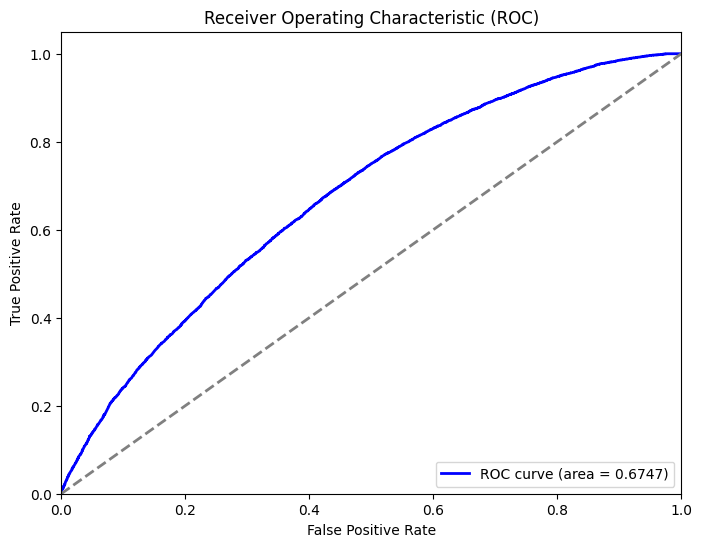

In [270]:

targets_df = sessions_tomodeling['conversion_rate']
fitches_df = sessions_tomodeling.drop(columns=['conversion_rate'])
print(f"targets_df: {targets_df.shape}\nfitches_df: {fitches_df.shape}")

fitches_train, fitches_test, target_train, target_test = train_test_split(fitches_df, targets_df, 
                                                                          test_size=0.3, random_state=42, stratify=targets_df)
print("размер датафрейма фитч для трейна: ", fitches_train.shape)
print("размер датафрейма с целевой переменной для трейна: ", target_train.shape)

#  SGDClassifier
# Создание и настройка SGDClassifier для логистической регрессии
sgd_log_reg = SGDClassifier(
    loss='log_loss',  # Логистическая регрессия
    alpha=0.0001,  # Регуляризационный параметр
    penalty='l2',  # L2 регуляризация
    max_iter=1000,  # Максимальное количество итераций не работает при partial_fit
    random_state=42,
    learning_rate='optimal',
    eta0=0.01,  # Начальный шаг обучения
    n_jobs=-1  # Использование всех доступных процессоров
)

sgd_log_reg.fit(fitches_train, target_train)
# # Обучение модели на батчах данных
# batch_size = 100000  # Размер батча
# n_batches = len(fitches_train) // batch_size + 1

# for i in range(n_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, len(fitches_train))
#      # Вычисление весов для каждого образца
#     # batch_weight = compute_sample_weight(class_weight=class_weights_dict, y=target_train[start:end])
#     sgd_log_reg.partial_fit(fitches_train[start:end], target_train[start:end], classes=[0, 1])#, sample_weight=batch_weight)

# Предсказания вероятностей для тестового набора
y_pred_proba = sgd_log_reg.predict_proba(fitches_test)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

drow_roc_auc(target_test, y_pred_proba)

# 0.6719 до изменений данных о городах c AlternativeName
# 0.6643 до изменения стратегии заполнения пустот в данных о городе

SGD Classifier работает быстрее при этом показатели метрики не сильно уступают MLPClassifier. <br> К тому же при использование SGDClassifier оценить влияние фитч на предсказание положительного класса не потребует дополнительных иследований.<br>
Поэтому решил оставить SGDClassifier.<br>
Выполнем слудующие действия:
- Избавляемся от фитч которые не повлияли на предсказание<br>
- Сохраняем обученную модель в пикл файл.

### определяем влияние фитч на модель SGDClassifier, избавляемся от нулевых

In [271]:
# Избавляемся от фитч которые не повлияли на предсказание
# Получение коэффициентов (весов) и свободного члена модели
coefficients = sgd_log_reg.coef_.flatten()  # Получаем одномерный массив коэффициентов
intercept = sgd_log_reg.intercept_[0]  # Получаем значение свободного члена (байеса)

# Получаем названия фичей
feature_names = fitches_train.columns

# Создаем DataFrame для хранения фичей и их вклада
feature_contributions = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Добавляем свободный член (bias) в DataFrame
feature_contributions.loc[len(feature_contributions)] = ['Intercept', intercept]

# Выводим результаты, отсортированные по вкладу в положительный класс целевой переменной (коэффициенту)
feature_contributions_sorted = feature_contributions.sort_values(by='Coefficient', ascending=False)
print(feature_contributions_sorted)

# Фильтрация фичей с нулевыми или близкими к нулю коэффициентами - их влияние на предсказание нулевое или близко к нулю
insignificant_features = feature_contributions[feature_contributions['Coefficient'].abs() < 0.001]

print("Фичи с нулевым или близкими к нулю весами:")
insignificant_features

                                Feature  Coefficient
51      utm_source_nrKihqcWGIzDsOqljdAv      1.12783
161   utm_campaign_kwdmElMUPDZaLQdgjcsI      1.10162
221  utm_adcontent_PkybGvWbaqORmxjNunqZ      1.08964
66    utm_campaign_DsqwamlMwRgMTyspCjFR      1.05336
0                      is_organic_visit      1.05271
..                                  ...          ...
19      utm_source_RmEBuqrriAfAVsLQQmhk     -1.00993
187   utm_campaign_vRLTQQKAsFQMxbcHGPhu     -1.03107
229  utm_adcontent_XKsYZiUFcdkUXQpoLKyS     -1.28294
225  utm_adcontent_TuyPWsGQruPMpKvRxeBF     -1.34525
673                           Intercept     -2.50003

[674 rows x 2 columns]
Фичи с нулевым или близкими к нулю весами:


,Feature,Coefficient
14,utm_source_MvfHsxITijuriZxsqZqt,0.00013
370,utm_keyword_pQhDyEDSvgnXNvMXPAhy,-0.00016


Удалим фитчи из нашего датафрейма и проведем тесты заново но уже обучим без батчей

targets_df: (101038,)
fitches_df: (101038, 671)
размер датафрейма фитч для трейна:  (70726, 671)
размер датафрейма с целевой переменной для трейна:  (70726,)
ROC-AUC Score: 0.6747


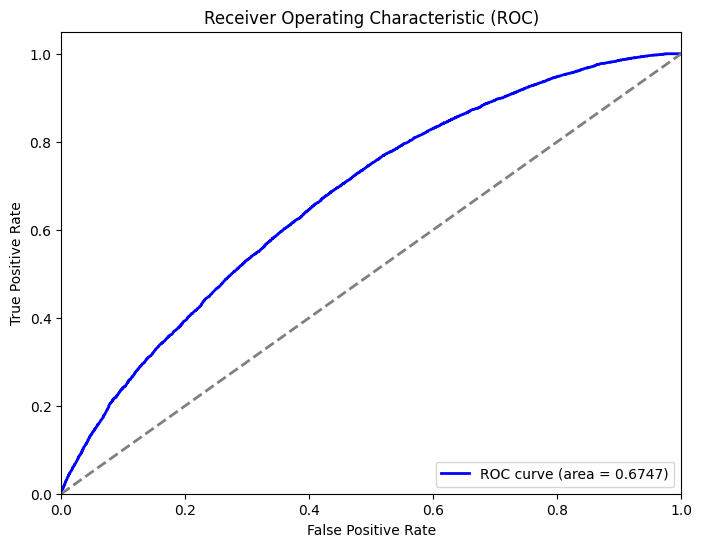

In [272]:
targets_df = sessions_tomodeling['conversion_rate']
fitches_df = sessions_tomodeling.drop(columns=['conversion_rate']+insignificant_features['Feature'].to_list())
print(f"targets_df: {targets_df.shape}\nfitches_df: {fitches_df.shape}")

fitches_train, fitches_test, target_train, target_test = train_test_split(fitches_df, targets_df, 
                                                                          test_size=0.3, random_state=42, stratify=targets_df)
print("размер датафрейма фитч для трейна: ", fitches_train.shape)
print("размер датафрейма с целевой переменной для трейна: ", target_train.shape)

#  SGDClassifier

# Создание и настройка SGDClassifier для логистической регрессии
sgd_log_reg = SGDClassifier(
    loss='log_loss',  # Логистическая регрессия
    alpha=0.0001,  # Регуляризационный параметр
    penalty='l2',  # L2 регуляризация
    random_state=42,
    learning_rate='optimal',
    eta0=0.01,  # Начальный шаг обучения
    n_jobs=-1  # Использование всех доступных процессоров
)

sgd_log_reg.fit(fitches_train, target_train)

# Предсказания вероятностей для тестового набора
y_pred_proba = sgd_log_reg.predict_proba(fitches_test)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

drow_roc_auc(target_test, y_pred_proba)

### Обучаем лучшую модель на всех данных

In [273]:
targets_df = sessions_tomodeling['conversion_rate']
fitches_df = sessions_tomodeling.drop(columns=['conversion_rate']+insignificant_features['Feature'].to_list())
print(f"targets_df: {targets_df.shape}\nfitches_df: {fitches_df.shape}")

fitches_final, fitches_finaltest, target_final, target_finaltest = train_test_split(fitches_df, targets_df, 
                                                                          test_size=0.001, random_state=42, stratify=targets_df)
print("размер датафрейма фитч для финального трейна: ", fitches_final.shape)
print("размер датафрейма с целевой переменной финального для трейна: ", target_final.shape)

#  SGDClassifier

# Создание и настройка SGDClassifier для логистической регрессии
sgd_log_reg = SGDClassifier(
    loss='log_loss',  # Логистическая регрессия
    alpha=0.0001,
    penalty='l2',
    random_state=42,
    learning_rate='optimal',
    early_stopping=True,  # Добавим этот параметр чтобы увелечение данных для обучения не ухудшило качество предсказания
    eta0=0.01,  # Начальный шаг обучения не исопльзуется если learning_rate='optimal'
    n_jobs=-1  # Использование всех доступных процессоров    
)
print(sgd_log_reg.get_params())
print("модель обьявлена (sgd_log_reg), данные готовы (fitches_final, target_final)")

targets_df: (101038,)
fitches_df: (101038, 671)
размер датафрейма фитч для финального трейна:  (100936, 671)
размер датафрейма с целевой переменной финального для трейна:  (100936,)
{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': True, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
модель обьявлена (sgd_log_reg), данные готовы (fitches_final, target_final)


In [274]:
# Обучаем модель на 99,9% данных
sgd_log_reg.fit(fitches_final, target_final)
print("Модель обучена")

Модель обучена


In [275]:
# Предсказания вероятностей для тестового набора
y_pred_proba = sgd_log_reg.predict_proba(fitches_finaltest)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_finaltest, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# 0.6469 при alpha = 0.0001 learning_rate = optimal
# 0.6729 learning_rate='adaptive', eta0=0.01,
# 0.6749 learning_rate='optimal', early_stopping=True,
# 0.6745 learning_rate='adaptive', early_stopping=True, eta0=0.01,
# 0.7089 до изменения стратегии заполнения пустот данных о городе

ROC-AUC Score: 0.7305


Сохраним Датафрейм с данными для теста нашего сервиса (мы не использовали эти данные для обучения выбранной модели)


In [ ]:
# мы это сделали в самом начале

### Сохраняем модель в файл pickle

In [ ]:
filename = "model_sgd_clsfr_tunned.pkl"

with open("model/"+filename, 'wb') as file:
    pickle.dump(sgd_log_reg, file)
    
print("Модель сохранена в файл", filename)

In [ ]:
with open("model/"+filename, 'rb') as file:
    model_fromfile = pickle.load(file)

y_pred_proba2 = model_fromfile.predict_proba(fitches_finaltest)[:, 1]

# Оценка модели с использованием ROC-AUC
roc_auc = roc_auc_score(target_finaltest, y_pred_proba2)
print(f'ROC-AUC Score: {roc_auc:.4f}')